# Peetz Post-Process
## Cleaned data import, further classification, and results presentation

In [1]:
import sys, os
import pickle
import numpy as np
from scipy import stats
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import copy

In [2]:
path='/projects/jasi4471/peetz/Batch_Jobs_V6/'

with open(path + 'Streamlined_pre_process_60-78.pkl', "rb") as fh:
    post_QC_data_ID_60_78 = pickle.load(fh)

with open(path + 'Streamlined_pre_process_82-83.pkl', "rb") as fh:
    post_QC_data_ID_82_83 = pickle.load(fh)

with open(path + 'Streamlined_pre_process_84.pkl', "rb") as fh:
    post_QC_data_ID_84 = pickle.load(fh)

with open(path + 'Streamlined_pre_process_85.pkl', "rb") as fh:
    post_QC_data_ID_85 = pickle.load(fh)

with open(path + 'Streamlined_pre_process_86.pkl', "rb") as fh:
    post_QC_data_ID_86 = pickle.load(fh)

with open(path + 'Streamlined_pre_process_87.pkl', "rb") as fh:
    post_QC_data_ID_87 = pickle.load(fh)

with open(path + 'Streamlined_pre_process_88-89.pkl', "rb") as fh:
    post_QC_data_ID_88_89 = pickle.load(fh)

post_QC_data_ID_60_78.keys()

dict_keys(['AWS_Vr_mat', 'WD_Vr_mat', 'CL_Vr_mat', 'WW_Vr_mat', 'AWS_Va_mat', 'WD_Va_mat', 'CL_Va_mat', 'WW_Va_mat', 'nrange2', 'ws_WC_80m', 'wd_WC_80m', 'ws_60m', 'wd_60m', 'yaw_offset_mean_list', 'yaw_offset_std_list', 'yaw_vane_mean_list', 'yaw_vane_std_list', 'scan_midtime_list', 'TI_60m_list', 'Obukhov_length_10m_list', 'RMSE_Vr_mat', 'RMSE_Va_mat', 'Dif_Vr_mat', 'Dif_Va_mat', 'Dif_max_Vr_list', 'Dif_max_Va_list', 'Steering_status_list'])

In [3]:
post_QC_data_v32 = {}

all_IDs = [post_QC_data_ID_60_78, post_QC_data_ID_82_83, post_QC_data_ID_84, post_QC_data_ID_85, post_QC_data_ID_86, post_QC_data_ID_87, post_QC_data_ID_88_89]

all_keys = post_QC_data_ID_60_78.keys()

for key in all_keys:
    df = all_IDs[0][key].copy()

    all_types = type(post_QC_data_ID_60_78[key])

    if all_types == pd.core.frame.DataFrame:
        df = all_IDs[0][key].copy()
        for i in range(1,7):
            df = pd.concat((df,all_IDs[i][key].copy()), axis=1)

    else:
        df = all_IDs[0][key].copy()
        for i in range(1,7):
            df = df+all_IDs[i][key].copy()

    post_QC_data_v32[key]=df.copy()

post_QC_data_v32

output = open('./post_QC_data_v32.pkl', 'wb')
pickle.dump(post_QC_data_v32, output)
output.close()

In [4]:
path='/projects/jasi4471/peetz/Batch_Jobs_V6/'

with open(path + 'QC_Counts_Streamlined_pre_process_60-78.pkl', "rb") as fh:
    QC_data_ID_60_78 = pickle.load(fh)

with open(path + 'QC_Counts_Streamlined_pre_process_82-83.pkl', "rb") as fh:
    QC_data_ID_82_83 = pickle.load(fh)

with open(path + 'QC_Counts_Streamlined_pre_process_84.pkl', "rb") as fh:
    QC_data_ID_84 = pickle.load(fh)

with open(path + 'QC_Counts_Streamlined_pre_process_85.pkl', "rb") as fh:
    QC_data_ID_85 = pickle.load(fh)

with open(path + 'QC_Counts_Streamlined_pre_process_86.pkl', "rb") as fh:
    QC_data_ID_86 = pickle.load(fh)

with open(path + 'QC_Counts_Streamlined_pre_process_87.pkl', "rb") as fh:
    QC_data_ID_87 = pickle.load(fh)

with open(path + 'QC_Counts_Streamlined_pre_process_88-89.pkl', "rb") as fh:
    QC_data_ID_88_89 = pickle.load(fh)

QC_data_ID_60_78.keys()

QC_data_v32 = {}

all_IDs = [QC_data_ID_60_78, QC_data_ID_82_83, QC_data_ID_84, QC_data_ID_85, QC_data_ID_86, QC_data_ID_87, QC_data_ID_88_89]

all_keys = QC_data_ID_60_78.keys()

for key in all_keys:
    df = copy.deepcopy(all_IDs[0][key])

    all_types = type(QC_data_ID_60_78[key])

    if all_types == pd.core.frame.DataFrame:
        df = copy.deepcopy(all_IDs[0][key])
        for i in range(1,7):
            df = pd.concat((df,all_IDs[i][key].copy()), axis=1)

    else:
        df = copy.deepcopy(all_IDs[0][key])
        for i in range(1,7):
            df = df+copy.deepcopy(all_IDs[i][key])

    QC_data_v32[key]=copy.deepcopy(df)

QC_data_v32

{'Total_Number_of_Range_Gates': 821844,
 'Number_Tossed_SNR': 7968,
 'Number_Tossed_Curve_Fit': 366606,
 'Number_Tossed_Downwind': 244798,
 'Total_Tossed': 619372,
 'Total_Kept': 202472}

In [5]:
print(round(QC_data_v32['Total_Kept'] / QC_data_v32['Total_Number_of_Range_Gates'] * 100, 2), '%')

24.64 %


In [6]:
path='/projects/jasi4471/peetz/'

with open(path + 'post_QC_data_v32.pkl', "rb") as fh: #32
    post_QC_data = pickle.load(fh)

post_QC_data.keys()

dict_keys(['AWS_Vr_mat', 'WD_Vr_mat', 'CL_Vr_mat', 'WW_Vr_mat', 'AWS_Va_mat', 'WD_Va_mat', 'CL_Va_mat', 'WW_Va_mat', 'nrange2', 'ws_WC_80m', 'wd_WC_80m', 'ws_60m', 'wd_60m', 'yaw_offset_mean_list', 'yaw_offset_std_list', 'yaw_vane_mean_list', 'yaw_vane_std_list', 'scan_midtime_list', 'TI_60m_list', 'Obukhov_length_10m_list', 'RMSE_Vr_mat', 'RMSE_Va_mat', 'Dif_Vr_mat', 'Dif_Va_mat', 'Dif_max_Vr_list', 'Dif_max_Va_list', 'Steering_status_list'])

## 1-D (time-history) data

In [7]:
stats = pd.DataFrame({
    'Diff Max': post_QC_data['Dif_max_Va_list'],
})
stats.index.name = 'time'

conditions = pd.DataFrame({
    'ws_WC_80m': post_QC_data['ws_WC_80m'],
    'wd_WC_80m': post_QC_data['wd_WC_80m'],
    'ws_60m': post_QC_data['ws_60m'],
    'wd_60m': post_QC_data['wd_60m'],
    'yaw_offset_mean_target': post_QC_data['yaw_offset_mean_list'],
    'yaw_offset_std_target': post_QC_data['yaw_offset_std_list'],
    'yaw_vane_mean': post_QC_data['yaw_vane_mean_list'],
    'yaw_vane_std': post_QC_data['yaw_vane_std_list'],
    'steering_status': post_QC_data['Steering_status_list'],
    'TI_60m': post_QC_data['TI_60m_list'],
    'Obukhov_length_10m':post_QC_data['Obukhov_length_10m_list'],
    'scan_midtime_list':post_QC_data['scan_midtime_list']
})
conditions.index.name = 'time'

## 2-D (time/range history) data

In [8]:
indices = [np.arange(N) for N in post_QC_data['WD_Va_mat'].T.shape]
indices[0] = np.array(pd.Series(post_QC_data['scan_midtime_list']))
indices

[array(['2019-08-17T00:07:10.684000000', '2019-08-17T00:14:18.956000000',
        '2019-08-17T00:21:25.539000000', ...,
        '2019-11-06T00:01:20.523000000', '2019-11-06T00:05:09.062000000',
        '2019-11-06T00:08:03.679000000'], dtype='datetime64[ns]'),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])]

In [9]:
indices = [np.arange(N) for N in post_QC_data['WD_Va_mat'].T.shape]
# indices[0] = np.array(pd.Series(post_QC_data['scan_midtime_list']))
multiidx = pd.MultiIndex.from_product(indices, names=['time','range'])

wake_Vr = pd.DataFrame({
    'WD': post_QC_data['WD_Vr_mat'].values.T.flatten(),
    'WW': post_QC_data['WW_Vr_mat'].values.T.flatten(),
    'AWS': post_QC_data['AWS_Vr_mat'].values.T.flatten(),
    'CL': post_QC_data['CL_Vr_mat'].values.T.flatten(),
    'RMSE_Vr': post_QC_data['RMSE_Vr_mat'].values.T.flatten(),
    'Dif_Vr': post_QC_data['Dif_Vr_mat'].values.T.flatten(),
}, index=multiidx)

wake_Va = pd.DataFrame({
    'WD': post_QC_data['WD_Va_mat'].values.T.flatten(),
    'WW': post_QC_data['WW_Va_mat'].values.T.flatten(),
    'AWS': post_QC_data['AWS_Va_mat'].values.T.flatten(),
    'CL': post_QC_data['CL_Va_mat'].values.T.flatten(),
    'RMSE_Va': post_QC_data['RMSE_Va_mat'].values.T.flatten(),
    'Dif_Va': post_QC_data['Dif_Va_mat'].values.T.flatten(),
}, index=multiidx)

# multiindex (long format)
wake_Va=wake_Va.replace(pd.NA, np.nan)
wake_Vr=wake_Vr.replace(pd.NA, np.nan)

# wide format
wake_Va['WD'].unstack()
wake_Vr['WD'].unstack()

wake_Va['WW']=wake_Va['WW']*4
wake_Vr['WW']=wake_Vr['WW']*4

## Apply QC with index, now the index has both the time and range

In [10]:
wake_Va=wake_Va.loc[(wake_Va.WW > 40) | (wake_Va.WW < 300)]
wake_Vr=wake_Vr.loc[(wake_Vr.WW > 40) | (wake_Vr.WW < 300)]

idx = wake_Va.index.get_level_values('time')
wake_Va['Diff Max'] = stats['Diff Max'].loc[idx].values
idx = wake_Vr.index.get_level_values('time')
wake_Vr['Diff Max'] = stats['Diff Max'].loc[idx].values

idx = wake_Va.index.get_level_values('time')
wake_Va['ws_WC_80m'] = conditions['ws_WC_80m'].loc[idx].values
wake_Va['ws_60m'] = conditions['ws_60m'].loc[idx].values
wake_Va['wd_WC_80m'] = conditions['wd_WC_80m'].loc[idx].values
wake_Va['wd_60m'] = conditions['wd_60m'].loc[idx].values
wake_Va['yaw_offset_mean_target'] = conditions['yaw_offset_mean_target'].loc[idx].values
wake_Va['yaw_offset_std_target'] = conditions['yaw_offset_std_target'].loc[idx].values
wake_Va['yaw_vane_mean'] = conditions['yaw_vane_mean'].loc[idx].values
wake_Va['yaw_vane_std'] = conditions['yaw_vane_std'].loc[idx].values
wake_Va['steering_status'] = conditions['steering_status'].loc[idx].values
wake_Va['Obukhov_length_10m'] = conditions['Obukhov_length_10m'].loc[idx].values
wake_Va['TI_60m'] = conditions['TI_60m'].loc[idx].values

idx = wake_Vr.index.get_level_values('time')
wake_Vr['ws_WC_80m'] = conditions['ws_WC_80m'].loc[idx].values
wake_Vr['ws_60m'] = conditions['ws_60m'].loc[idx].values
wake_Vr['wd_WC_80m'] = conditions['wd_WC_80m'].loc[idx].values
wake_Vr['wd_60m'] = conditions['wd_60m'].loc[idx].values
wake_Vr['yaw_offset_mean_target'] = conditions['yaw_offset_mean_target'].loc[idx].values
wake_Vr['yaw_offset_std_target'] = conditions['yaw_offset_std_target'].loc[idx].values
wake_Vr['yaw_vane_mean'] = conditions['yaw_vane_mean'].loc[idx].values
wake_Vr['yaw_vane_std'] = conditions['yaw_vane_std'].loc[idx].values
wake_Vr['steering_status'] = conditions['steering_status'].loc[idx].values
wake_Vr['Obukhov_length_10m'] = conditions['Obukhov_length_10m'].loc[idx].values
wake_Vr['TI_60m'] = conditions['TI_60m'].loc[idx].values

wake_Va['WD']=wake_Va['WD']/wake_Va['ws_WC_80m']*100
wake_Vr['WD']=wake_Vr['WD']/wake_Vr['ws_WC_80m']*100
wake_Va['WW']=wake_Va['WW']/77
wake_Vr['WW']=wake_Vr['WW']/77
wake_Va['CL']=wake_Va['CL']/77
wake_Vr['CL']=wake_Vr['CL']/77

## Add other columns and then apply QC needed

In [11]:
wake_Va=wake_Va.loc[(wake_Va['wd_WC_80m'] > 280)  | (wake_Va['wd_WC_80m'] < 60)]
wake_Vr=wake_Vr.loc[(wake_Vr['wd_WC_80m'] > 280)  | (wake_Vr['wd_WC_80m'] < 60)]

# wake_Vr = wake_Vr.loc[wake_Vr.RMSE_Vr >= 0.05]  ###  NOT USING ANYMORE!  This is // WAS // our F-test removal with a threshold P value of 'less than 0.05'. This filter removes single-gaussian fits that have p < 0.05. Later, we will add in all of the double-gaussian fits. Do we also need to remove doubles that are > 0.05 first before combining the two? We don't have both a single and double for every single case because of our "QC" process.

n=len(wake_Va['WD'].unstack().mean())
WD_Va_mean=wake_Va['WD'].unstack().mean()
WD_Va_std=wake_Va['WD'].unstack().std()
WD_Va_median=wake_Va['WD'].unstack().median()

n=len(wake_Vr['WD'].unstack().mean())
WD_Vr_mean=wake_Vr['WD'].unstack().mean()
WD_Vr_std=wake_Vr['WD'].unstack().std()
WD_Vr_median=wake_Vr['WD'].unstack().median()

WW_Va_mean=wake_Va['WW'].unstack().mean()
WW_Va_std=wake_Va['WW'].unstack().std()
WW_Va_median=wake_Va['WW'].unstack().median()

WW_Vr_mean=wake_Vr['WW'].unstack().mean()
WW_Vr_std=wake_Vr['WW'].unstack().std()
WW_Vr_median=wake_Vr['WW'].unstack().median()

CL_Va_mean=wake_Va['CL'].unstack().mean()
CL_Va_std=wake_Va['CL'].unstack().std()
CL_Va_median=wake_Va['CL'].unstack().median()

CL_Vr_mean=wake_Vr['CL'].unstack().mean()
CL_Vr_std=wake_Vr['CL'].unstack().std()
CL_Vr_median=wake_Vr['CL'].unstack().median()

nrange2 = post_QC_data['nrange2']
rotor_diameter = 77
Rd = np.array([x/(-77) for x in nrange2])

D=77
n=int(12)

wake_Va['zL']=10/wake_Va.Obukhov_length_10m
index=(wake_Va['zL'] < -2) | (wake_Va['zL'] > 2)
wake_Va.zL[index]=np.nan

wake_Vr['zL']=10/wake_Vr.Obukhov_length_10m
index=(wake_Vr['zL'] < -2) | (wake_Vr['zL'] > 2)
wake_Vr.zL[index]=np.nan

# label_sidechain = WD_Va_mean*np.nan

## Curve fit error distribution

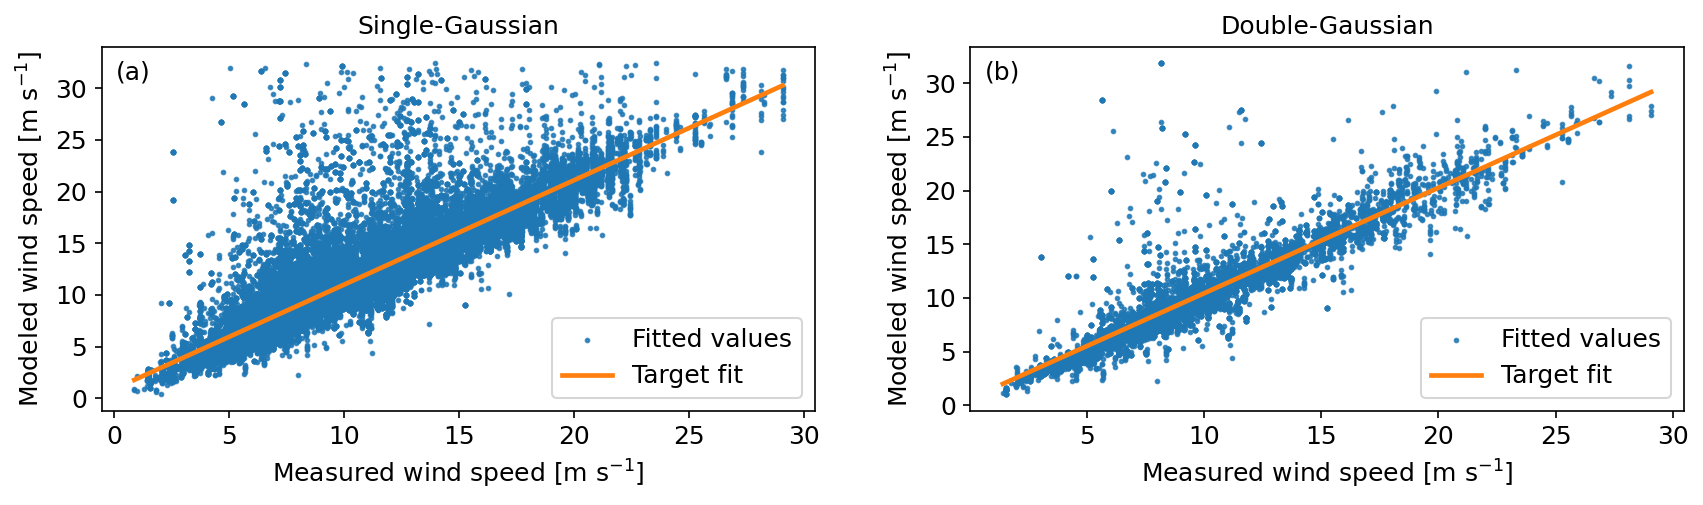

In [49]:
fig=plt.figure(figsize=(12,4), dpi=150)

ax=fig.add_subplot(121)
sns.regplot(x='ws_WC_80m', y='AWS', data=wake_Vr, ci=95, order=1, marker='.', scatter_kws={"color":"C0","s":12}, line_kws={"color":"C1","label":"Target fit"}, label='Fitted values')
plt.title("Single-Gaussian",fontsize=12)
plt.xlabel('Measured wind speed [m s$^{-1}$]',fontsize=12)
plt.ylabel('Modeled wind speed [m s$^{-1}$]',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.text(.02,.91, '(a)',fontsize=12, transform=ax.transAxes)

ax=fig.add_subplot(122)
sns.regplot(x='ws_WC_80m', y='AWS', data=wake_Va, ci=95, order=1, marker='.', scatter_kws={"color":"C0","s":12}, line_kws={"color":"C1","label":"Target fit"}, label='Fitted values')
plt.title("Double-Gaussian",fontsize=12)
plt.xlabel('Measured wind speed [m s$^{-1}$]',fontsize=12)
plt.ylabel('Modeled wind speed [m s$^{-1}$]',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.text(.02,.91, '(b)',fontsize=12, transform=ax.transAxes)

fig.tight_layout(pad=3)

file_name = '/projects/jasi4471/peetz/Figures_Final_V1/curve_fit_error.pdf'
plt.savefig(file_name, bbox_inches='tight', format='pdf')

## Further Classification

In [12]:
### Combnine double and single
wake_Vr = wake_Vr.combine_first(wake_Va)

### Vr (single-gaussian)
unyawed=(wake_Vr['yaw_vane_std'] < 10) & (wake_Vr['steering_status'] <0.1) & ((wake_Vr['yaw_vane_mean'] > -2) & (wake_Vr['yaw_vane_mean'] <2))
yawed=(wake_Vr['yaw_vane_std'] < 10) & (wake_Vr['steering_status'] > 0.1) & (((wake_Vr['yaw_vane_mean'] > 2) & (wake_Vr['yaw_vane_mean'] < 20)) | ((wake_Vr['yaw_vane_mean'] < -2) & (wake_Vr['yaw_vane_mean'] > -20)))

Region_all= ((wake_Vr['ws_WC_80m'] >= 2.5) & (wake_Vr['ws_WC_80m'] < 25))
Region2=((wake_Vr['ws_WC_80m'] >= 2.5) & (wake_Vr['ws_WC_80m'] < 9))
Region2p5=(wake_Vr['ws_WC_80m'] >= 9) & (wake_Vr['ws_WC_80m'] < 14)
Region3=(wake_Vr['ws_WC_80m'] >= 14) & (wake_Vr['ws_WC_80m'] < 25)

stable=(wake_Vr['zL'] > 0.01)
unstable=(wake_Vr['zL'] < -0.01)
neutral=((wake_Vr['zL'] < 0.01) & (wake_Vr['zL'] > -0.01))

lowTI=(wake_Vr['TI_60m'] <8)
highTI=(wake_Vr['TI_60m'] >8)


### Va (double-gaussian)
_unyawed=(wake_Va['yaw_vane_std'] < 10) & (wake_Va['steering_status'] <0.1) & ((wake_Va['yaw_vane_mean'] > -2) & (wake_Va['yaw_vane_mean'] <2))
_yawed=(wake_Va['yaw_vane_std'] < 10) & (wake_Va['steering_status'] > 0.1) & (((wake_Va['yaw_vane_mean'] > 2) & (wake_Va['yaw_vane_mean'] < 20)) | ((wake_Va['yaw_vane_mean'] < -2) & (wake_Va['yaw_vane_mean'] > -20)))

_Region_all= ((wake_Va['ws_WC_80m'] >= 2.5) & (wake_Va['ws_WC_80m'] < 25))
_Region2=((wake_Va['ws_WC_80m'] >= 2.5) & (wake_Va['ws_WC_80m'] < 9))
_Region2p5=(wake_Va['ws_WC_80m'] >= 9) & (wake_Va['ws_WC_80m'] < 14)
_Region3=(wake_Va['ws_WC_80m'] >= 14) & (wake_Va['ws_WC_80m'] < 25)

_stable=(wake_Va['zL'] > 0.01)
_unstable=(wake_Va['zL'] < -0.01)
_neutral=((wake_Va['zL'] < 0.01) & (wake_Va['zL'] > -0.01))

_lowTI=(wake_Va['TI_60m'] <8)
_highTI=(wake_Va['TI_60m'] >8)

## Plots

In [112]:
from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

label_sidechain = WD_Vr_mean*np.nan

### Overall performance (mean / median)
AWS_overall = pd.DataFrame()
AWS_overall['Mean'] = wake_Vr[Region_all].AWS.unstack().mean()
AWS_overall['Median'] = wake_Vr[Region_all].AWS.unstack().median()
AWS_overall['Std'] = wake_Vr[Region_all].AWS.unstack().std()
AWS_overall['Count'] = wake_Vr[Region_all].AWS.unstack().count()
# AWS_overall['T-test'] = stats.ttest_1samp(wake_Vr[Region_all].AWS.unstack().mean(), wake_Vr[Region_all].AWS.unstack().mean(), nan_policy='omit').pvalue
# AWS_overall['T-test'] = stats.ttest_ind(wake_Vr[Region_all].AWS.unstack().mean(), wake_Vr[Region_all].AWS.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
AWS_overall['T-test'] = stats.ttest_ind_from_stats(wake_Vr[Region_all].AWS.unstack().mean(), wake_Vr[Region_all].AWS.unstack().std(), wake_Vr[Region_all].AWS.unstack().count(), wake_Vr[Region_all].AWS.unstack().mean(), wake_Vr[Region_all].AWS.unstack().std(), wake_Vr[Region_all].AWS.unstack().count(), equal_var=False).pvalue
# print(AWS_overall['T-test'])

WD_overall = pd.DataFrame()
WD_overall['Mean'] = wake_Vr[Region_all].WD.unstack().mean()
WD_overall['Median'] = wake_Vr[Region_all].WD.unstack().median()
WD_overall['Std'] = wake_Vr[Region_all].WD.unstack().std()
WD_overall['Count'] = wake_Vr[Region_all].WD.unstack().count()
# WD_overall['T-test'] = stats.ttest_1samp(wake_Vr[Region_all].WD.unstack().mean(), wake_Vr[Region_all].WD.unstack().mean(), nan_policy='omit').pvalue
# WD_overall['T-test'] = stats.ttest_ind(wake_Vr[Region_all].WD.unstack().mean(), wake_Vr[Region_all].WD.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
WD_overall['T-test'] = stats.ttest_ind_from_stats(wake_Vr[Region_all].WD.unstack().mean(), wake_Vr[Region_all].WD.unstack().std(), wake_Vr[Region_all].WD.unstack().count(), wake_Vr[Region_all].WD.unstack().mean(), wake_Vr[Region_all].WD.unstack().std(), wake_Vr[Region_all].WD.unstack().count(), equal_var=False).pvalue

WW_overall = pd.DataFrame()
WW_overall['Mean'] = wake_Vr[Region_all].WW.unstack().mean()
WW_overall['Median'] = wake_Vr[Region_all].WW.unstack().median()
WW_overall['Std'] = wake_Vr[Region_all].WW.unstack().std()
WW_overall['Count'] = wake_Vr[Region_all].WW.unstack().count()
# WW_overall['T-test'] = stats.ttest_1samp(wake_Vr[Region_all].WW.unstack().mean(), wake_Vr[Region_all].WW.unstack().mean(), nan_policy='omit').pvalue
# WW_overall['T-test'] = stats.ttest_ind(wake_Vr[Region_all].WW.unstack().mean(), wake_Vr[Region_all].WW.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
WW_overall['T-test'] = stats.ttest_ind_from_stats(wake_Vr[Region_all].WW.unstack().mean(), wake_Vr[Region_all].WW.unstack().std(), wake_Vr[Region_all].WW.unstack().count(), wake_Vr[Region_all].WW.unstack().mean(), wake_Vr[Region_all].WW.unstack().std(), wake_Vr[Region_all].WW.unstack().count(), equal_var=False).pvalue

CL_overall = pd.DataFrame()
CL_overall['Mean'] = wake_Vr[Region_all].CL.unstack().mean()
CL_overall['Median'] = wake_Vr[Region_all].CL.unstack().median()
CL_overall['Std'] = wake_Vr[Region_all].CL.unstack().std()
CL_overall['Count'] = wake_Vr[Region_all].CL.unstack().count()
# CL_overall['T-test'] = stats.ttest_1samp(wake_Vr[Region_all].CL.unstack().mean(), wake_Vr[Region_all].CL.unstack().mean(), nan_policy='omit').pvalue
# CL_overall['T-test'] = stats.ttest_ind(wake_Vr[Region_all].CL.unstack().mean(), wake_Vr[Region_all].CL.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
CL_overall['T-test'] = stats.ttest_ind_from_stats(wake_Vr[Region_all].CL.unstack().mean(), wake_Vr[Region_all].CL.unstack().std(), wake_Vr[Region_all].CL.unstack().count(), wake_Vr[Region_all].CL.unstack().mean(), wake_Vr[Region_all].CL.unstack().std(), wake_Vr[Region_all].CL.unstack().count(), equal_var=False).pvalue


### Turbine operating condition
WD_region = pd.DataFrame()
WD_region['R2_mean'] = wake_Vr[Region2].WD.unstack().mean()
WD_region['R2_std'] = wake_Vr[Region2].WD.unstack().std()
WD_region['R2_count'] = wake_Vr[Region2].WD.unstack().count()
WD_region['R2p5_mean'] = wake_Vr[Region2p5].WD.unstack().mean()
WD_region['R2p5_std'] = wake_Vr[Region2p5].WD.unstack().std()
WD_region['R2p5_count'] = wake_Vr[Region2p5].WD.unstack().count()
WD_region['R3_mean'] = wake_Vr[Region3].WD.unstack().mean()
WD_region['R3_std'] = wake_Vr[Region3].WD.unstack().std()
WD_region['R3_count'] = wake_Vr[Region3].WD.unstack().count()
# WD_region['R2_test'] = stats.ttest_1samp(wake_Vr[Region2].WD.unstack().mean(), wake_Vr[Region2p5].WD.unstack().mean(), nan_policy='omit').pvalue
# WD_region['R2p5_test'] = stats.ttest_1samp(wake_Vr[Region2].WD.unstack().mean(), wake_Vr[Region2p5].WD.unstack().mean(), nan_policy='omit').pvalue
# WD_region['R3_test'] = stats.ttest_1samp(wake_Vr[Region2p5].WD.unstack().mean(), wake_Vr[Region3].WD.unstack().mean(), nan_policy='omit').pvalue
# WD_region['R2_test'] = stats.ttest_ind(wake_Vr[Region2].WD.unstack().mean(), wake_Vr[Region2p5].WD.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
# WD_region['R2p5_test'] = stats.ttest_ind(wake_Vr[Region2].WD.unstack().mean(), wake_Vr[Region2p5].WD.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
# WD_region['R3_test'] = stats.ttest_ind(wake_Vr[Region2p5].WD.unstack().mean(), wake_Vr[Region3].WD.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
WD_region['R2_test'] = stats.ttest_ind_from_stats(wake_Vr[Region2].WD.unstack().mean(), wake_Vr[Region2].WD.unstack().std(), wake_Vr[Region2].WD.unstack().count(), wake_Vr[Region2p5].WD.unstack().mean(), wake_Vr[Region2p5].WD.unstack().std(), wake_Vr[Region2p5].WD.unstack().count(), equal_var=False).pvalue
WD_region['R2p5_test'] = stats.ttest_ind_from_stats(wake_Vr[Region2].WD.unstack().mean(), wake_Vr[Region2].WD.unstack().std(), wake_Vr[Region2].WD.unstack().count(), wake_Vr[Region2p5].WD.unstack().mean(), wake_Vr[Region2p5].WD.unstack().std(), wake_Vr[Region2p5].WD.unstack().count(), equal_var=False).pvalue
WD_region['R3_test'] = stats.ttest_ind_from_stats(wake_Vr[Region2p5].WD.unstack().mean(), wake_Vr[Region2p5].WD.unstack().std(), wake_Vr[Region2p5].WD.unstack().count(), wake_Vr[Region3].WD.unstack().mean(), wake_Vr[Region3].WD.unstack().std(), wake_Vr[Region3].WD.unstack().count(), equal_var=False).pvalue

WD_yawed_unyawed = pd.DataFrame()
WD_yawed_unyawed['Unyawed_mean'] = wake_Vr[unyawed&Region_all].WD.unstack().mean()
WD_yawed_unyawed['Unyawed_std'] = wake_Vr[unyawed&Region_all].WD.unstack().std()
WD_yawed_unyawed['Unyawed_count'] = wake_Vr[unyawed&Region_all].WD.unstack().count()
WD_yawed_unyawed['Yawed_mean'] = wake_Vr[yawed&Region_all].WD.unstack().mean()
WD_yawed_unyawed['Yawed_std'] = wake_Vr[yawed&Region_all].WD.unstack().std()
WD_yawed_unyawed['Yawed_count'] = wake_Vr[yawed&Region_all].WD.unstack().count()
# WD_yawed_unyawed['T-test'] = stats.ttest_1samp(wake_Vr[yawed&Region_all].WD.unstack().mean(), wake_Vr[unyawed&Region_all].WD.unstack().mean(), nan_policy='omit').pvalue
# WD_yawed_unyawed['T-test'] = stats.ttest_ind(wake_Vr[yawed&Region_all].WD.unstack().mean(), wake_Vr[unyawed&Region_all].WD.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
WD_yawed_unyawed['T-test'] = stats.ttest_ind_from_stats(wake_Vr[yawed&Region_all].WD.unstack().mean(), wake_Vr[yawed&Region_all].WD.unstack().std(), wake_Vr[yawed&Region_all].WD.unstack().count(), wake_Vr[unyawed&Region_all].WD.unstack().mean(), wake_Vr[unyawed&Region_all].WD.unstack().std(), wake_Vr[unyawed&Region_all].WD.unstack().count(), equal_var=False).pvalue

WW_region = pd.DataFrame()
WW_region['R2_mean'] = wake_Vr[Region2].WW.unstack().mean()
WW_region['R2_std'] = wake_Vr[Region2].WW.unstack().std()
WW_region['R2_count'] = wake_Vr[Region2].WW.unstack().count()
WW_region['R2p5_mean'] = wake_Vr[Region2p5].WW.unstack().mean()
WW_region['R2p5_std'] = wake_Vr[Region2p5].WW.unstack().std()
WW_region['R2p5_count'] = wake_Vr[Region2p5].WW.unstack().count()
WW_region['R3_mean'] = wake_Vr[Region3].WW.unstack().mean()
WW_region['R3_std'] = wake_Vr[Region3].WW.unstack().std()
WW_region['R3_count'] = wake_Vr[Region3].WW.unstack().count()
# WW_region['R2_test'] = stats.ttest_1samp(wake_Vr[Region2].WW.unstack().mean(), wake_Vr[Region2p5].WW.unstack().mean(), nan_policy='omit').pvalue
# WW_region['R2p5_test'] = stats.ttest_1samp(wake_Vr[Region2].WW.unstack().mean(), wake_Vr[Region2p5].WW.unstack().mean(), nan_policy='omit').pvalue
# WW_region['R3_test'] = stats.ttest_1samp(wake_Vr[Region2p5].WW.unstack().mean(), wake_Vr[Region3].WW.unstack().mean(), nan_policy='omit').pvalue
# WW_region['R2_test'] = stats.ttest_ind(wake_Vr[Region2].WW.unstack().mean(), wake_Vr[Region2p5].WW.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
# WW_region['R2p5_test'] = stats.ttest_ind(wake_Vr[Region2].WW.unstack().mean(), wake_Vr[Region2p5].WW.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
# WW_region['R3_test'] = stats.ttest_ind(wake_Vr[Region2p5].WW.unstack().mean(), wake_Vr[Region3].WW.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
WW_region['R2_test'] = stats.ttest_ind_from_stats(wake_Vr[Region2].WW.unstack().mean(), wake_Vr[Region2].WW.unstack().std(), wake_Vr[Region2].WW.unstack().count(), wake_Vr[Region2p5].WW.unstack().mean(), wake_Vr[Region2p5].WW.unstack().std(), wake_Vr[Region2p5].WW.unstack().count(), equal_var=False).pvalue
WW_region['R2p5_test'] = stats.ttest_ind_from_stats(wake_Vr[Region2].WW.unstack().mean(), wake_Vr[Region2].WW.unstack().std(), wake_Vr[Region2].WW.unstack().count(), wake_Vr[Region2p5].WW.unstack().mean(), wake_Vr[Region2p5].WW.unstack().std(), wake_Vr[Region2p5].WW.unstack().count(), equal_var=False).pvalue
WW_region['R3_test'] = stats.ttest_ind_from_stats(wake_Vr[Region2p5].WW.unstack().mean(), wake_Vr[Region2p5].WW.unstack().std(), wake_Vr[Region2p5].WW.unstack().count(), wake_Vr[Region3].WW.unstack().mean(), wake_Vr[Region3].WW.unstack().std(), wake_Vr[Region3].WW.unstack().count(), equal_var=False).pvalue

WW_yawed_unyawed = pd.DataFrame()
WW_yawed_unyawed['Unyawed_mean'] = wake_Vr[unyawed&Region_all].WW.unstack().mean()
WW_yawed_unyawed['Unyawed_std'] = wake_Vr[unyawed&Region_all].WW.unstack().std()
WW_yawed_unyawed['Unyawed_count'] = wake_Vr[unyawed&Region_all].WW.unstack().count()
WW_yawed_unyawed['Yawed_mean'] = wake_Vr[yawed&Region_all].WW.unstack().mean()
WW_yawed_unyawed['Yawed_std'] = wake_Vr[yawed&Region_all].WW.unstack().std()
WW_yawed_unyawed['Yawed_count'] = wake_Vr[yawed&Region_all].WW.unstack().count()
# WW_yawed_unyawed['T-test'] = stats.ttest_1samp(wake_Vr[yawed&Region_all].WW.unstack().mean(), wake_Vr[unyawed&Region_all].WW.unstack().mean(), nan_policy='omit').pvalue
# WW_yawed_unyawed['T-test'] = stats.ttest_ind(wake_Vr[yawed&Region_all].WW.unstack().mean(), wake_Vr[unyawed&Region_all].WW.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
WW_yawed_unyawed['T-test'] = stats.ttest_ind_from_stats(wake_Vr[yawed&Region_all].WW.unstack().mean(), wake_Vr[yawed&Region_all].WW.unstack().std(), wake_Vr[yawed&Region_all].WW.unstack().count(), wake_Vr[unyawed&Region_all].WW.unstack().mean(), wake_Vr[unyawed&Region_all].WW.unstack().std(), wake_Vr[unyawed&Region_all].WW.unstack().count(), equal_var=False).pvalue

CL_region = pd.DataFrame()
CL_region['R2_mean'] = wake_Vr[Region2].CL.unstack().mean()
CL_region['R2_std'] = wake_Vr[Region2].CL.unstack().std()
CL_region['R2_count'] = wake_Vr[Region2].CL.unstack().count()
CL_region['R2p5_mean'] = wake_Vr[Region2p5].CL.unstack().mean()
CL_region['R2p5_std'] = wake_Vr[Region2p5].CL.unstack().std()
CL_region['R2p5_count'] = wake_Vr[Region2p5].CL.unstack().count()
CL_region['R3_mean'] = wake_Vr[Region3].CL.unstack().mean()
CL_region['R3_std'] = wake_Vr[Region3].CL.unstack().std()
CL_region['R3_count'] = wake_Vr[Region3].CL.unstack().count()
# CL_region['R2_test'] = stats.ttest_1samp(wake_Vr[Region2].CL.unstack().mean(), wake_Vr[Region2p5].CL.unstack().mean(), nan_policy='omit').pvalue
# CL_region['R2p5_test'] = stats.ttest_1samp(wake_Vr[Region2].CL.unstack().mean(), wake_Vr[Region2p5].CL.unstack().mean(), nan_policy='omit').pvalue
# CL_region['R3_test'] = stats.ttest_1samp(wake_Vr[Region2].CL.unstack().mean(), wake_Vr[Region3].CL.unstack().mean(), nan_policy='omit').pvalue
# CL_region['R2_test'] = stats.ttest_ind(wake_Vr[Region2].CL.unstack().mean(), wake_Vr[Region2p5].CL.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
# CL_region['R2p5_test'] = stats.ttest_ind(wake_Vr[Region2].CL.unstack().mean(), wake_Vr[Region2p5].CL.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
# CL_region['R3_test'] = stats.ttest_ind(wake_Vr[Region2].CL.unstack().mean(), wake_Vr[Region3].CL.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
CL_region['R2_test'] = stats.ttest_ind_from_stats(wake_Vr[Region2].CL.unstack().mean(), wake_Vr[Region2].CL.unstack().std(), wake_Vr[Region2].CL.unstack().count(), wake_Vr[Region2p5].CL.unstack().mean(), wake_Vr[Region2p5].CL.unstack().std(), wake_Vr[Region2p5].CL.unstack().count(), equal_var=False).pvalue
CL_region['R2p5_test'] = stats.ttest_ind_from_stats(wake_Vr[Region2].CL.unstack().mean(), wake_Vr[Region2].CL.unstack().std(), wake_Vr[Region2].CL.unstack().count(), wake_Vr[Region2p5].CL.unstack().mean(), wake_Vr[Region2p5].CL.unstack().std(), wake_Vr[Region2p5].CL.unstack().count(), equal_var=False).pvalue
CL_region['R3_test'] = stats.ttest_ind_from_stats(wake_Vr[Region2].CL.unstack().mean(), wake_Vr[Region2].CL.unstack().std(), wake_Vr[Region2].CL.unstack().count(), wake_Vr[Region3].CL.unstack().mean(), wake_Vr[Region3].CL.unstack().std(), wake_Vr[Region3].CL.unstack().count(), equal_var=False).pvalue

CL_yawed_unyawed = pd.DataFrame()
CL_yawed_unyawed['Unyawed_mean'] = wake_Vr[unyawed&Region_all].CL.unstack().mean()
CL_yawed_unyawed['Unyawed_std'] = wake_Vr[unyawed&Region_all].CL.unstack().std()
CL_yawed_unyawed['Unyawed_count'] = wake_Vr[unyawed&Region_all].CL.unstack().count()
CL_yawed_unyawed['Yawed_mean'] = wake_Vr[yawed&Region_all].CL.unstack().mean()
CL_yawed_unyawed['Yawed_std'] = wake_Vr[yawed&Region_all].CL.unstack().std()
CL_yawed_unyawed['Yawed_count'] = wake_Vr[yawed&Region_all].CL.unstack().count()
# CL_yawed_unyawed['T-test'] = stats.ttest_1samp(wake_Vr[yawed&Region_all].CL.unstack().mean(), wake_Vr[unyawed&Region_all].CL.unstack().mean(), nan_policy='omit').pvalue
# CL_yawed_unyawed['T-test'] = stats.ttest_ind(wake_Vr[yawed&Region_all].CL.unstack().mean(), wake_Vr[unyawed&Region_all].CL.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
CL_yawed_unyawed['T-test'] = stats.ttest_ind_from_stats(wake_Vr[yawed&Region_all].CL.unstack().mean(), wake_Vr[yawed&Region_all].CL.unstack().std(), wake_Vr[yawed&Region_all].CL.unstack().count(), wake_Vr[unyawed&Region_all].CL.unstack().mean(), wake_Vr[unyawed&Region_all].CL.unstack().std(), wake_Vr[unyawed&Region_all].CL.unstack().count(), equal_var=False).pvalue


### Atmospheric stability - Velocity deficit
WD_stable = pd.DataFrame()
WD_stable['Unyawed_mean'] = wake_Vr[unyawed&stable&Region2+Region2p5].WD.unstack().mean()
WD_stable['Unyawed_std'] = wake_Vr[unyawed&stable&Region2+Region2p5].WD.unstack().std()
WD_stable['Unyawed_count'] = wake_Vr[unyawed&stable&Region2+Region2p5].WD.unstack().count()
WD_stable['Yawed_mean'] = wake_Vr[yawed&stable&Region2+Region2p5].WD.unstack().mean()
WD_stable['Yawed_std'] = wake_Vr[yawed&stable&Region2+Region2p5].WD.unstack().std()
WD_stable['Yawed_count'] = wake_Vr[yawed&stable&Region2+Region2p5].WD.unstack().count()
# WD_stable['T-test'] = stats.ttest_1samp(wake_Vr[yawed&stable&Region2+Region2p5].WD.unstack().mean(), wake_Vr[unyawed&stable&Region2+Region2p5].WD.unstack().mean(), nan_policy='omit').pvalue
# WD_stable['T-test'] = stats.ttest_ind(wake_Vr[yawed&stable&Region2+Region2p5].WD.unstack().mean(), wake_Vr[unyawed&stable&Region2+Region2p5].WD.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
WD_stable['T-test'] = stats.ttest_ind_from_stats(wake_Vr[yawed&stable&Region2+Region2p5].WD.unstack().mean(), wake_Vr[yawed&stable&Region2+Region2p5].WD.unstack().std(), wake_Vr[yawed&stable&Region2+Region2p5].WD.unstack().count(), wake_Vr[unyawed&stable&Region2+Region2p5].WD.unstack().mean(), wake_Vr[unyawed&stable&Region2+Region2p5].WD.unstack().std(), wake_Vr[unyawed&stable&Region2+Region2p5].WD.unstack().count(), equal_var=False).pvalue

WD_unstable = pd.DataFrame()
WD_unstable['Unyawed_mean'] = wake_Vr[unyawed&unstable&Region2+Region2p5].WD.unstack().mean()
WD_unstable['Unyawed_std'] = wake_Vr[unyawed&unstable&Region2+Region2p5].WD.unstack().std()
WD_unstable['Unyawed_count'] = wake_Vr[unyawed&unstable&Region2+Region2p5].WD.unstack().count()
WD_unstable['Yawed_mean'] = wake_Vr[yawed&unstable&Region2+Region2p5].WD.unstack().mean()
WD_unstable['Yawed_std'] = wake_Vr[yawed&unstable&Region2+Region2p5].WD.unstack().std()
WD_unstable['Yawed_count'] = wake_Vr[yawed&unstable&Region2+Region2p5].WD.unstack().count()
# WD_unstable['T-test'] = stats.ttest_1samp(wake_Vr[yawed&unstable&Region2+Region2p5].WD.unstack().mean(), wake_Vr[unyawed&unstable&Region2+Region2p5].WD.unstack().mean(), nan_policy='omit').pvalue
# WD_unstable['T-test'] = stats.ttest_ind(wake_Vr[yawed&unstable&Region2+Region2p5].WD.unstack().mean(), wake_Vr[unyawed&unstable&Region2+Region2p5].WD.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
WD_unstable['T-test'] = stats.ttest_ind_from_stats(wake_Vr[yawed&unstable&Region2+Region2p5].WD.unstack().mean(), wake_Vr[yawed&unstable&Region2+Region2p5].WD.unstack().std(), wake_Vr[yawed&unstable&Region2+Region2p5].WD.unstack().count(), wake_Vr[unyawed&unstable&Region2+Region2p5].WD.unstack().mean(), wake_Vr[unyawed&unstable&Region2+Region2p5].WD.unstack().std(), wake_Vr[unyawed&unstable&Region2+Region2p5].WD.unstack().count(), equal_var=False).pvalue

WD_lowTI = pd.DataFrame()
WD_lowTI['Unyawed_mean'] = wake_Vr[unyawed&lowTI&Region2+Region2p5].WD.unstack().mean()
WD_lowTI['Unyawed_std'] = wake_Vr[unyawed&lowTI&Region2+Region2p5].WD.unstack().std()
WD_lowTI['Unyawed_count'] = wake_Vr[unyawed&lowTI&Region2+Region2p5].WD.unstack().count()
WD_lowTI['Yawed_mean'] = wake_Vr[yawed&lowTI&Region2+Region2p5].WD.unstack().mean()
WD_lowTI['Yawed_std'] = wake_Vr[yawed&lowTI&Region2+Region2p5].WD.unstack().std()
WD_lowTI['Yawed_count'] = wake_Vr[yawed&lowTI&Region2+Region2p5].WD.unstack().count()
# WD_lowTI['T-test'] = stats.ttest_1samp(wake_Vr[yawed&lowTI&Region2+Region2p5].WD.unstack().mean(), wake_Vr[unyawed&lowTI&Region2+Region2p5].WD.unstack().mean(), nan_policy='omit').pvalue
# WD_lowTI['T-test'] = stats.ttest_ind(wake_Vr[yawed&lowTI&Region2+Region2p5].WD.unstack().mean(), wake_Vr[unyawed&lowTI&Region2+Region2p5].WD.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
WD_lowTI['T-test'] = stats.ttest_ind_from_stats(wake_Vr[yawed&lowTI&Region2+Region2p5].WD.unstack().mean(), wake_Vr[yawed&lowTI&Region2+Region2p5].WD.unstack().std(), wake_Vr[yawed&lowTI&Region2+Region2p5].WD.unstack().count(), wake_Vr[unyawed&lowTI&Region2+Region2p5].WD.unstack().mean(), wake_Vr[unyawed&lowTI&Region2+Region2p5].WD.unstack().std(), wake_Vr[unyawed&lowTI&Region2+Region2p5].WD.unstack().count(), equal_var=False).pvalue

WD_highTI = pd.DataFrame()
WD_highTI['Unyawed_mean'] = wake_Vr[unyawed&highTI&Region2+Region2p5].WD.unstack().mean()
WD_highTI['Unyawed_std'] = wake_Vr[unyawed&highTI&Region2+Region2p5].WD.unstack().std()
WD_highTI['Unyawed_count'] = wake_Vr[unyawed&highTI&Region2+Region2p5].WD.unstack().count()
WD_highTI['Yawed_mean'] = wake_Vr[yawed&highTI&Region2+Region2p5].WD.unstack().mean()
WD_highTI['Yawed_std'] = wake_Vr[yawed&highTI&Region2+Region2p5].WD.unstack().std()
WD_highTI['Yawed_count'] = wake_Vr[yawed&highTI&Region2+Region2p5].WD.unstack().count()
# WD_highTI['T-test'] = stats.ttest_1samp(wake_Vr[yawed&highTI&Region2+Region2p5].WD.unstack().mean(), wake_Vr[unyawed&unstable&Region2+Region2p5].WD.unstack().mean(), nan_policy='omit').pvalue
# WD_highTI['T-test'] = stats.ttest_ind(wake_Vr[yawed&highTI&Region2+Region2p5].WD.unstack().mean(), wake_Vr[unyawed&unstable&Region2+Region2p5].WD.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
WD_highTI['T-test'] = stats.ttest_ind_from_stats(wake_Vr[yawed&highTI&Region2+Region2p5].WD.unstack().mean(), wake_Vr[yawed&highTI&Region2+Region2p5].WD.unstack().std(), wake_Vr[yawed&highTI&Region2+Region2p5].WD.unstack().count(), wake_Vr[unyawed&unstable&Region2+Region2p5].WD.unstack().mean(), wake_Vr[unyawed&unstable&Region2+Region2p5].WD.unstack().std(), wake_Vr[unyawed&unstable&Region2+Region2p5].WD.unstack().count(), equal_var=False).pvalue


### Atmospheric stability - Wake width
WW_stable = pd.DataFrame()
WW_stable['Unyawed_mean'] = wake_Vr[unyawed&stable&Region2+Region2p5].WW.unstack().mean()
WW_stable['Unyawed_std'] = wake_Vr[unyawed&stable&Region2+Region2p5].WW.unstack().std()
WW_stable['Unyawed_count'] = wake_Vr[unyawed&stable&Region2+Region2p5].WW.unstack().count()
WW_stable['Yawed_mean'] = wake_Vr[yawed&stable&Region2+Region2p5].WW.unstack().mean()
WW_stable['Yawed_std'] = wake_Vr[yawed&stable&Region2+Region2p5].WW.unstack().std()
WW_stable['Yawed_count'] = wake_Vr[yawed&stable&Region2+Region2p5].WW.unstack().count()
# WW_stable['T-test'] = stats.ttest_1samp(wake_Vr[yawed&stable&Region2+Region2p5].WW.unstack().mean(), wake_Vr[unyawed&stable&Region2+Region2p5].WD.unstack().mean(), nan_policy='omit').pvalue
# WW_stable['T-test'] = stats.ttest_ind(wake_Vr[yawed&stable&Region2+Region2p5].WW.unstack().mean(), wake_Vr[unyawed&stable&Region2+Region2p5].WD.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
WW_stable['T-test'] = stats.ttest_ind_from_stats(wake_Vr[yawed&stable&Region2+Region2p5].WW.unstack().mean(), wake_Vr[yawed&stable&Region2+Region2p5].WW.unstack().std(), wake_Vr[yawed&stable&Region2+Region2p5].WW.unstack().count(), wake_Vr[unyawed&stable&Region2+Region2p5].WD.unstack().mean(), wake_Vr[unyawed&stable&Region2+Region2p5].WD.unstack().std(), wake_Vr[unyawed&stable&Region2+Region2p5].WD.unstack().count(), equal_var=False).pvalue

WW_unstable = pd.DataFrame()
WW_unstable['Unyawed_mean'] = wake_Vr[unyawed&unstable&Region2+Region2p5].WW.unstack().mean()
WW_unstable['Unyawed_std'] = wake_Vr[unyawed&unstable&Region2+Region2p5].WW.unstack().std()
WW_unstable['Unyawed_count'] = wake_Vr[unyawed&unstable&Region2+Region2p5].WW.unstack().count()
WW_unstable['Yawed_mean'] = wake_Vr[yawed&unstable&Region2+Region2p5].WW.unstack().mean()
WW_unstable['Yawed_std'] = wake_Vr[yawed&unstable&Region2+Region2p5].WW.unstack().std()
WW_unstable['Yawed_count'] = wake_Vr[yawed&unstable&Region2+Region2p5].WW.unstack().count()
# WW_unstable['T-test'] = stats.ttest_1samp(wake_Vr[yawed&unstable&Region2+Region2p5].WW.unstack().mean(), wake_Vr[unyawed&unstable&Region2+Region2p5].WW.unstack().mean(), nan_policy='omit').pvalue
# WW_unstable['T-test'] = stats.ttest_ind(wake_Vr[yawed&unstable&Region2+Region2p5].WW.unstack().mean(), wake_Vr[unyawed&unstable&Region2+Region2p5].WW.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
WW_unstable['T-test'] = stats.ttest_ind_from_stats(wake_Vr[yawed&unstable&Region2+Region2p5].WW.unstack().mean(), wake_Vr[yawed&unstable&Region2+Region2p5].WW.unstack().std(), wake_Vr[yawed&unstable&Region2+Region2p5].WW.unstack().count(), wake_Vr[unyawed&unstable&Region2+Region2p5].WW.unstack().mean(), wake_Vr[unyawed&unstable&Region2+Region2p5].WW.unstack().std(), wake_Vr[unyawed&unstable&Region2+Region2p5].WW.unstack().count(), equal_var=False).pvalue

WW_lowTI = pd.DataFrame()
WW_lowTI['Unyawed_mean'] = wake_Vr[unyawed&lowTI&Region2+Region2p5].WW.unstack().mean()
WW_lowTI['Unyawed_std'] = wake_Vr[unyawed&lowTI&Region2+Region2p5].WW.unstack().std()
WW_lowTI['Unyawed_count'] = wake_Vr[unyawed&lowTI&Region2+Region2p5].WW.unstack().count()
WW_lowTI['Yawed_mean'] = wake_Vr[yawed&lowTI&Region2+Region2p5].WW.unstack().mean()
WW_lowTI['Yawed_std'] = wake_Vr[yawed&lowTI&Region2+Region2p5].WW.unstack().std()
WW_lowTI['Yawed_count'] = wake_Vr[yawed&lowTI&Region2+Region2p5].WW.unstack().count()
# WW_lowTI['T-test'] = stats.ttest_1samp(wake_Vr[yawed&lowTI&Region2+Region2p5].WW.unstack().mean(), wake_Vr[unyawed&lowTI&Region2+Region2p5].WW.unstack().mean(), nan_policy='omit').pvalue
# WW_lowTI['T-test'] = stats.ttest_ind(wake_Vr[yawed&lowTI&Region2+Region2p5].WW.unstack().mean(), wake_Vr[unyawed&lowTI&Region2+Region2p5].WW.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
WW_lowTI['T-test'] = stats.ttest_ind_from_stats(wake_Vr[yawed&lowTI&Region2+Region2p5].WW.unstack().mean(), wake_Vr[yawed&lowTI&Region2+Region2p5].WW.unstack().std(), wake_Vr[yawed&lowTI&Region2+Region2p5].WW.unstack().count(), wake_Vr[unyawed&lowTI&Region2+Region2p5].WW.unstack().mean(), wake_Vr[unyawed&lowTI&Region2+Region2p5].WW.unstack().std(), wake_Vr[unyawed&lowTI&Region2+Region2p5].WW.unstack().count(), equal_var=False).pvalue

WW_highTI = pd.DataFrame()
WW_highTI['Unyawed_mean'] = wake_Vr[unyawed&highTI&Region2+Region2p5].WW.unstack().mean()
WW_highTI['Unyawed_std'] = wake_Vr[unyawed&highTI&Region2+Region2p5].WW.unstack().std()
WW_highTI['Unyawed_count'] = wake_Vr[unyawed&highTI&Region2+Region2p5].WW.unstack().count()
WW_highTI['Yawed_mean'] = wake_Vr[yawed&highTI&Region2+Region2p5].WW.unstack().mean()
WW_highTI['Yawed_std'] = wake_Vr[yawed&highTI&Region2+Region2p5].WW.unstack().std()
WW_highTI['Yawed_count'] = wake_Vr[yawed&highTI&Region2+Region2p5].WW.unstack().count()
# WW_highTI['T-test'] = stats.ttest_1samp(wake_Vr[yawed&highTI&Region2+Region2p5].WW.unstack().mean(), wake_Vr[unyawed&unstable&Region2+Region2p5].WW.unstack().mean(), nan_policy='omit').pvalue
# WW_highTI['T-test'] = stats.ttest_ind(wake_Vr[yawed&highTI&Region2+Region2p5].WW.unstack().mean(), wake_Vr[unyawed&unstable&Region2+Region2p5].WW.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
WW_highTI['T-test'] = stats.ttest_ind_from_stats(wake_Vr[yawed&highTI&Region2+Region2p5].WW.unstack().mean(), wake_Vr[yawed&highTI&Region2+Region2p5].WW.unstack().std(), wake_Vr[yawed&highTI&Region2+Region2p5].WW.unstack().count(), wake_Vr[unyawed&unstable&Region2+Region2p5].WW.unstack().mean(), wake_Vr[unyawed&unstable&Region2+Region2p5].WW.unstack().std(), wake_Vr[unyawed&unstable&Region2+Region2p5].WW.unstack().count(), equal_var=False).pvalue


### Atmospheric stability - Wake center
CL_stable = pd.DataFrame()
CL_stable['Unyawed_mean'] = wake_Vr[unyawed&stable&Region2+Region2p5].CL.unstack().mean()
CL_stable['Unyawed_std'] = wake_Vr[unyawed&stable&Region2+Region2p5].CL.unstack().std()
CL_stable['Unyawed_count'] = wake_Vr[unyawed&stable&Region2+Region2p5].CL.unstack().count()
CL_stable['Yawed_mean'] = wake_Vr[yawed&stable&Region2+Region2p5].CL.unstack().mean()
CL_stable['Yawed_std'] = wake_Vr[yawed&stable&Region2+Region2p5].CL.unstack().std()
CL_stable['Yawed_count'] = wake_Vr[yawed&stable&Region2+Region2p5].CL.unstack().count()
# CL_stable['T-test'] = stats.ttest_1samp(wake_Vr[yawed&stable&Region2+Region2p5].CL.unstack().mean(), wake_Vr[unyawed&stable&Region2+Region2p5].CL.unstack().mean(), nan_policy='omit').pvalue
# CL_stable['T-test'] = stats.ttest_ind(wake_Vr[yawed&stable&Region2+Region2p5].CL.unstack().mean(), wake_Vr[unyawed&stable&Region2+Region2p5].CL.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
CL_stable['T-test'] = stats.ttest_ind_from_stats(wake_Vr[yawed&stable&Region2+Region2p5].CL.unstack().mean(), wake_Vr[yawed&stable&Region2+Region2p5].CL.unstack().std(), wake_Vr[yawed&stable&Region2+Region2p5].CL.unstack().count(), wake_Vr[unyawed&stable&Region2+Region2p5].CL.unstack().mean(), wake_Vr[unyawed&stable&Region2+Region2p5].CL.unstack().std(), wake_Vr[unyawed&stable&Region2+Region2p5].CL.unstack().count(), equal_var=False).pvalue

CL_unstable = pd.DataFrame()
CL_unstable['Unyawed_mean'] = wake_Vr[unyawed&unstable&Region2+Region2p5].CL.unstack().mean()
CL_unstable['Unyawed_std'] = wake_Vr[unyawed&unstable&Region2+Region2p5].CL.unstack().std()
CL_unstable['Unyawed_count'] = wake_Vr[unyawed&unstable&Region2+Region2p5].CL.unstack().count()
CL_unstable['Yawed_mean'] = wake_Vr[yawed&unstable&Region2+Region2p5].CL.unstack().mean()
CL_unstable['Yawed_std'] = wake_Vr[yawed&unstable&Region2+Region2p5].CL.unstack().std()
CL_unstable['Yawed_count'] = wake_Vr[yawed&unstable&Region2+Region2p5].CL.unstack().count()
# CL_unstable['T-test'] = stats.ttest_1samp(wake_Vr[yawed&unstable&Region2+Region2p5].CL.unstack().mean(), wake_Vr[unyawed&unstable&Region2+Region2p5].CL.unstack().mean(), nan_policy='omit').pvalue
# CL_unstable['T-test'] = stats.ttest_ind(wake_Vr[yawed&unstable&Region2+Region2p5].CL.unstack().mean(), wake_Vr[unyawed&unstable&Region2+Region2p5].CL.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
CL_unstable['T-test'] = stats.ttest_ind_from_stats(wake_Vr[yawed&unstable&Region2+Region2p5].CL.unstack().mean(), wake_Vr[yawed&unstable&Region2+Region2p5].CL.unstack().std(), wake_Vr[yawed&unstable&Region2+Region2p5].CL.unstack().count(), wake_Vr[unyawed&unstable&Region2+Region2p5].CL.unstack().mean(),  wake_Vr[unyawed&unstable&Region2+Region2p5].CL.unstack().std(),  wake_Vr[unyawed&unstable&Region2+Region2p5].CL.unstack().count(), equal_var=False).pvalue

CL_lowTI = pd.DataFrame()
CL_lowTI['Unyawed_mean'] = wake_Vr[unyawed&lowTI&Region2+Region2p5].CL.unstack().mean()
CL_lowTI['Unyawed_std'] = wake_Vr[unyawed&lowTI&Region2+Region2p5].CL.unstack().std()
CL_lowTI['Unyawed_count'] = wake_Vr[unyawed&lowTI&Region2+Region2p5].CL.unstack().count()
CL_lowTI['Yawed_mean'] = wake_Vr[yawed&lowTI&Region2+Region2p5].CL.unstack().mean()
CL_lowTI['Yawed_std'] = wake_Vr[yawed&lowTI&Region2+Region2p5].CL.unstack().std()
CL_lowTI['Yawed_count'] = wake_Vr[yawed&lowTI&Region2+Region2p5].CL.unstack().count()
# CL_lowTI['T-test'] = stats.ttest_1samp(wake_Vr[yawed&lowTI&Region2+Region2p5].CL.unstack().mean(), wake_Vr[unyawed&lowTI&Region2+Region2p5].CL.unstack().mean(), nan_policy='omit').pvalue
# CL_lowTI['T-test'] = stats.ttest_ind(wake_Vr[yawed&lowTI&Region2+Region2p5].CL.unstack().mean(), wake_Vr[unyawed&lowTI&Region2+Region2p5].CL.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
CL_lowTI['T-test'] = stats.ttest_ind_from_stats(wake_Vr[yawed&lowTI&Region2+Region2p5].CL.unstack().mean(), wake_Vr[yawed&lowTI&Region2+Region2p5].CL.unstack().std(), wake_Vr[yawed&lowTI&Region2+Region2p5].CL.unstack().count(), wake_Vr[unyawed&lowTI&Region2+Region2p5].CL.unstack().mean(), wake_Vr[unyawed&lowTI&Region2+Region2p5].CL.unstack().std(), wake_Vr[unyawed&lowTI&Region2+Region2p5].CL.unstack().count(), equal_var=False).pvalue

CL_highTI = pd.DataFrame()
CL_highTI['Unyawed_mean'] = wake_Vr[unyawed&highTI&Region2+Region2p5].CL.unstack().mean()
CL_highTI['Unyawed_std'] = wake_Vr[unyawed&highTI&Region2+Region2p5].CL.unstack().std()
CL_highTI['Unyawed_count'] = wake_Vr[unyawed&highTI&Region2+Region2p5].CL.unstack().count()
CL_highTI['Yawed_mean'] = wake_Vr[yawed&highTI&Region2+Region2p5].CL.unstack().mean()
CL_highTI['Yawed_std'] = wake_Vr[yawed&highTI&Region2+Region2p5].CL.unstack().std()
CL_highTI['Yawed_count'] = wake_Vr[yawed&highTI&Region2+Region2p5].CL.unstack().count()
# CL_highTI['T-test'] = stats.ttest_1samp(wake_Vr[yawed&highTI&Region2+Region2p5].CL.unstack().mean(), wake_Vr[unyawed&unstable&Region2+Region2p5].CL.unstack().mean(), nan_policy='omit').pvalue
# CL_highTI['T-test'] = stats.ttest_ind(wake_Vr[yawed&highTI&Region2+Region2p5].CL.unstack().mean(), wake_Vr[unyawed&unstable&Region2+Region2p5].CL.unstack().mean(), equal_var=False, nan_policy='omit').pvalue
CL_highTI['T-test'] = stats.ttest_ind_from_stats(wake_Vr[yawed&highTI&Region2+Region2p5].CL.unstack().mean(), wake_Vr[yawed&highTI&Region2+Region2p5].CL.unstack().std(), wake_Vr[yawed&highTI&Region2+Region2p5].CL.unstack().count(), wake_Vr[unyawed&unstable&Region2+Region2p5].CL.unstack().mean(), wake_Vr[unyawed&unstable&Region2+Region2p5].CL.unstack().std(), wake_Vr[unyawed&unstable&Region2+Region2p5].CL.unstack().count(), equal_var=False).pvalue

alpha=0.05

In [113]:
CL_highTI.loc[CL_highTI['T-test']<alpha]

,Unyawed_mean,Unyawed_std,Unyawed_count,Yawed_mean,Yawed_std,Yawed_count,T-test
range,,,,,,,
0,-0.100188,0.273163,548,-0.207270,0.352237,1226,5.745571e-19
1,-0.162521,0.325778,415,-0.211714,0.344860,1003,1.982136e-14
2,-0.119099,0.244496,322,-0.244581,0.371117,874,4.620613e-17
3,-0.172776,0.423111,293,-0.282180,0.373824,716,1.177617e-11
4,-0.154365,0.463925,247,-0.281758,0.344261,621,1.350492e-10
5,-0.133772,0.453467,211,-0.315319,0.399796,562,7.692099e-11
6,-0.142130,0.491085,191,-0.333271,0.401307,516,3.996565e-12
7,-0.134317,0.311248,159,-0.353738,0.424671,389,1.076950e-15
8,-0.102740,0.262762,127,-0.376757,0.512901,307,1.012859e-05


In [114]:
CL_highTI.Yawed_mean.mask(CL_highTI['T-test']>alpha, other=np.nan)

range
0    -0.207270
1    -0.211714
2    -0.244581
3    -0.282180
4    -0.281758
5    -0.315319
6    -0.333271
7    -0.353738
8    -0.376757
9    -0.316078
10   -0.314869
11   -0.348884
Name: Yawed_mean, dtype: float64

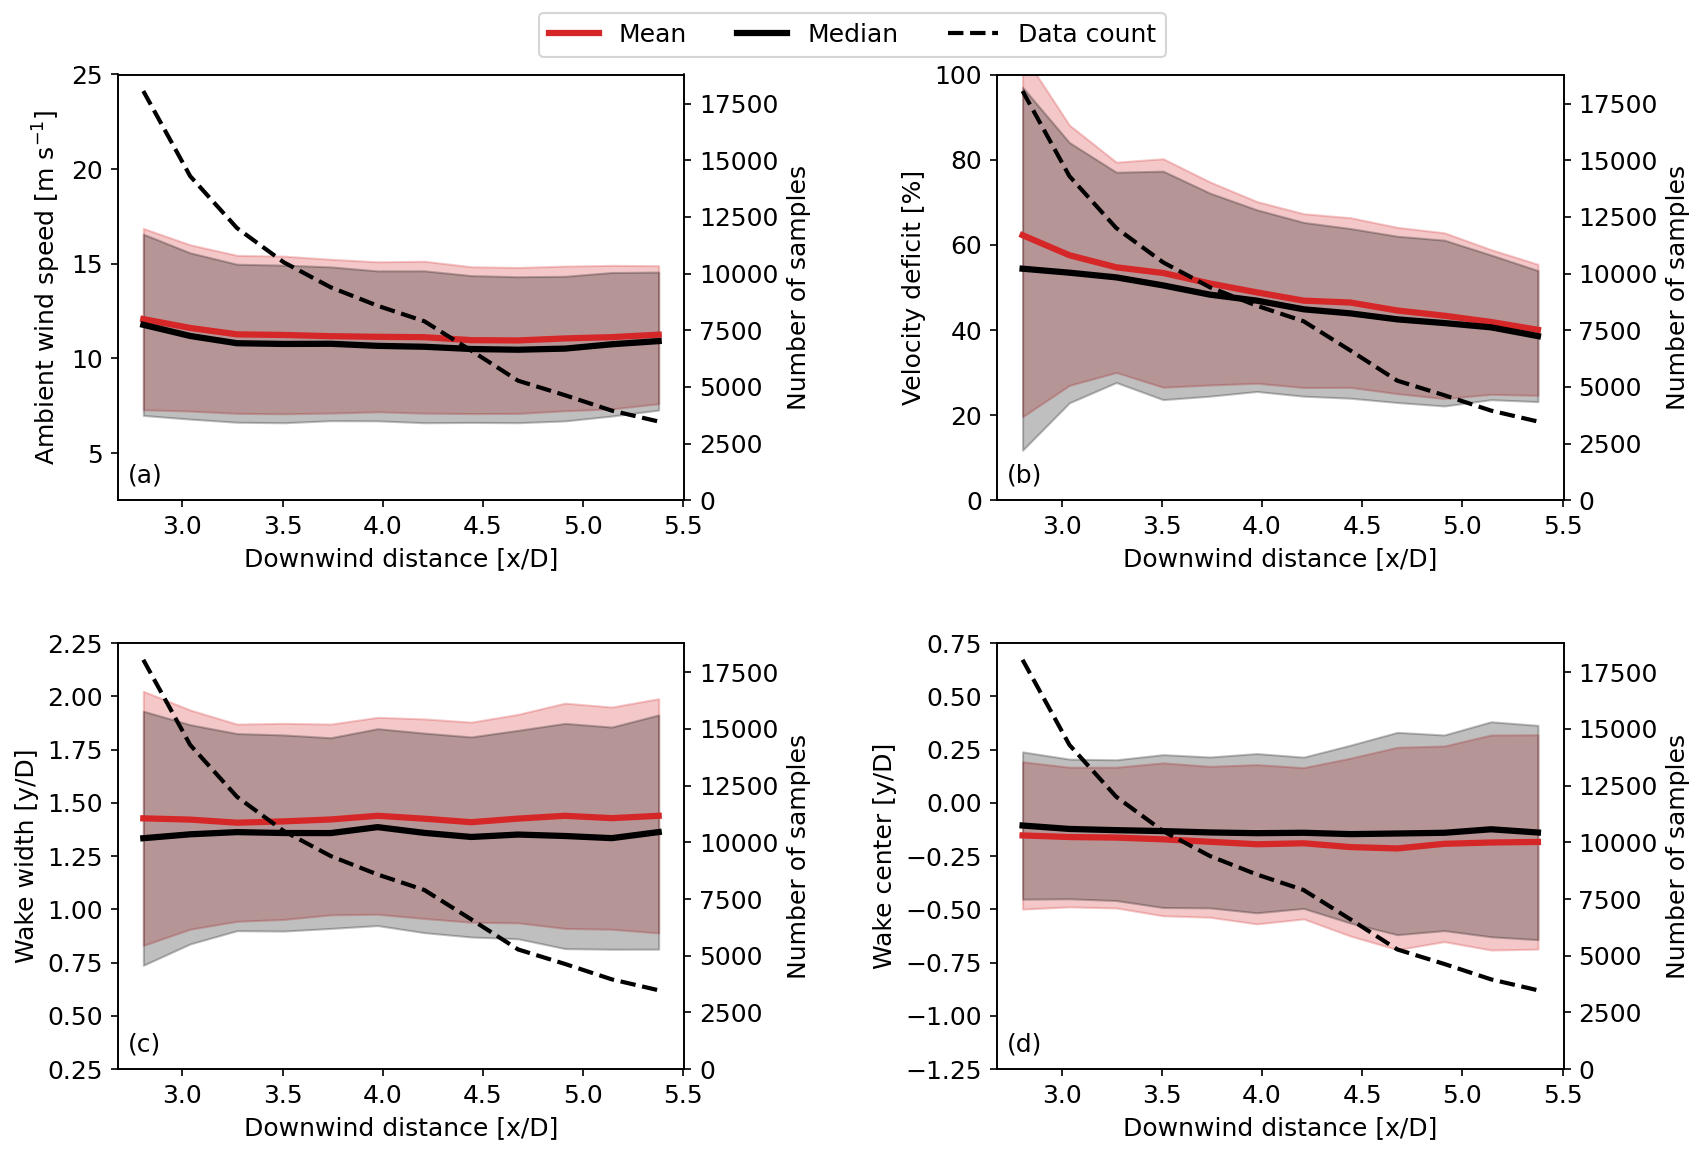

In [115]:
### Overall performance (mean / median)

fig=plt.figure(figsize=(12,8), dpi=150)
fmt='-'
sdif='d'
# sdif='-'

### Ambient wind speed

ax1=fig.add_subplot(221)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], AWS_overall.Mean, fmt=fmt, lw=3, color="C3", label="Mean")
ax1.fill_between(Rd[0:n], AWS_overall.Mean-AWS_overall.Std, AWS_overall.Mean+AWS_overall.Std, color='C3', alpha=0.25)
ax1.errorbar(Rd[0:n], AWS_overall.Mean.mask(AWS_overall['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="C3")
ax1.errorbar(Rd[0:n], AWS_overall.Median, fmt=fmt, lw=3, color='black', label="Median")
ax1.fill_between(Rd[0:n], AWS_overall.Median-AWS_overall.Std, AWS_overall.Median+AWS_overall.Std, color='black', alpha=0.25)
ax1.errorbar(Rd[0:n], AWS_overall.Median.mask(AWS_overall['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="black")
ax2.errorbar(Rd[0:n], AWS_overall.Count, fmt='--', lw=2, color='black')
ax1.errorbar(Rd[0:n], label_sidechain, label='Data count', fmt='--', lw=2, color='black')
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Ambient wind speed [m s$^{-1}$]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(2.5, 25)
ax2.set_ylim(ymin=0)
ax1.text(0.018,0.042,'(a)',fontsize=12,transform=ax1.transAxes)


### Velocity deficit

ax1=fig.add_subplot(222)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], WD_overall.Mean, fmt=fmt, lw=3, color="C3", label="Mean")
ax1.fill_between(Rd[0:n], WD_overall.Mean-WD_overall.Std, WD_overall.Mean+WD_overall.Std, color='C3', alpha=0.25)
ax1.errorbar(Rd[0:n], WD_overall.Mean.mask(WD_overall['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="C3")
ax1.errorbar(Rd[0:n], WD_overall.Median, fmt=fmt, lw=3, color='black', label="Median")
ax1.fill_between(Rd[0:n], WD_overall.Median-WD_overall.Std, WD_overall.Median+WD_overall.Std, color='black', alpha=0.25)
ax1.errorbar(Rd[0:n], WD_overall.Median.mask(WD_overall['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="black")
ax2.errorbar(Rd[0:n], WD_overall.Count, fmt='--', lw=2, color='black')
ax1.errorbar(Rd[0:n], label_sidechain, label='Data count', fmt='--', lw=2, color='black')
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax2.set_ylim(ymin=0)
ax1.text(0.018,0.042,'(b)',fontsize=12,transform=ax1.transAxes)


### Wake width

ax1=fig.add_subplot(223)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], WW_overall.Mean, fmt=fmt, lw=3, color="C3", label="Mean")
ax1.fill_between(Rd[0:n], WW_overall.Mean-WW_overall.Std, WW_overall.Mean+WW_overall.Std, color='C3', alpha=0.25)
ax1.errorbar(Rd[0:n], WW_overall.Mean.mask(WW_overall['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="C3")
ax1.errorbar(Rd[0:n], WW_overall.Median, fmt=fmt, lw=3, color='black', label="Median")
ax1.fill_between(Rd[0:n], WW_overall.Median-WW_overall.Std, WW_overall.Median+WW_overall.Std, color='black', alpha=0.25)
ax1.errorbar(Rd[0:n], WW_overall.Median.mask(WW_overall['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="black")
ax2.errorbar(Rd[0:n], WW_overall.Count, fmt='--', lw=2, color='black')
ax1.errorbar(Rd[0:n], label_sidechain, label='Data count', fmt='--', lw=2, color='black')
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake width [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0.25,2.25)
ax2.set_ylim(ymin=0)
ax1.text(0.018,0.042,'(c)',fontsize=12,transform=ax1.transAxes)


### Wake center

ax1=fig.add_subplot(224)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], CL_overall.Mean, fmt=fmt, lw=3, color="C3", label="Mean")
ax1.fill_between(Rd[0:n], CL_overall.Mean-CL_overall.Std, CL_overall.Mean+CL_overall.Std, color='C3', alpha=0.25)
ax1.errorbar(Rd[0:n], CL_overall.Mean.mask(CL_overall['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="C3")
ax1.errorbar(Rd[0:n], CL_overall.Median, fmt=fmt, lw=3, color='black', label="Median")
ax1.fill_between(Rd[0:n], CL_overall.Median-CL_overall.Std, CL_overall.Median+CL_overall.Std, color='black', alpha=0.25)
ax1.errorbar(Rd[0:n], CL_overall.Median.mask(CL_overall['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="black")
ax2.errorbar(Rd[0:n], CL_overall.Count, fmt='--', lw=2, color='black')
ax1.errorbar(Rd[0:n], label_sidechain, label='Data count', fmt='--', lw=2, color='black')
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake center [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(-1.25,0.75)
ax2.set_ylim(ymin=0)
ax1.text(0.018,0.042,'(d)',fontsize=12,transform=ax1.transAxes)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, ncol=4, loc='upper center', fontsize=12)

fig.tight_layout(pad=3)

file_name = '/projects/jasi4471/peetz/Figures_Final_V1/mean_median.pdf'
plt.savefig(file_name, bbox_inches='tight', format='pdf')

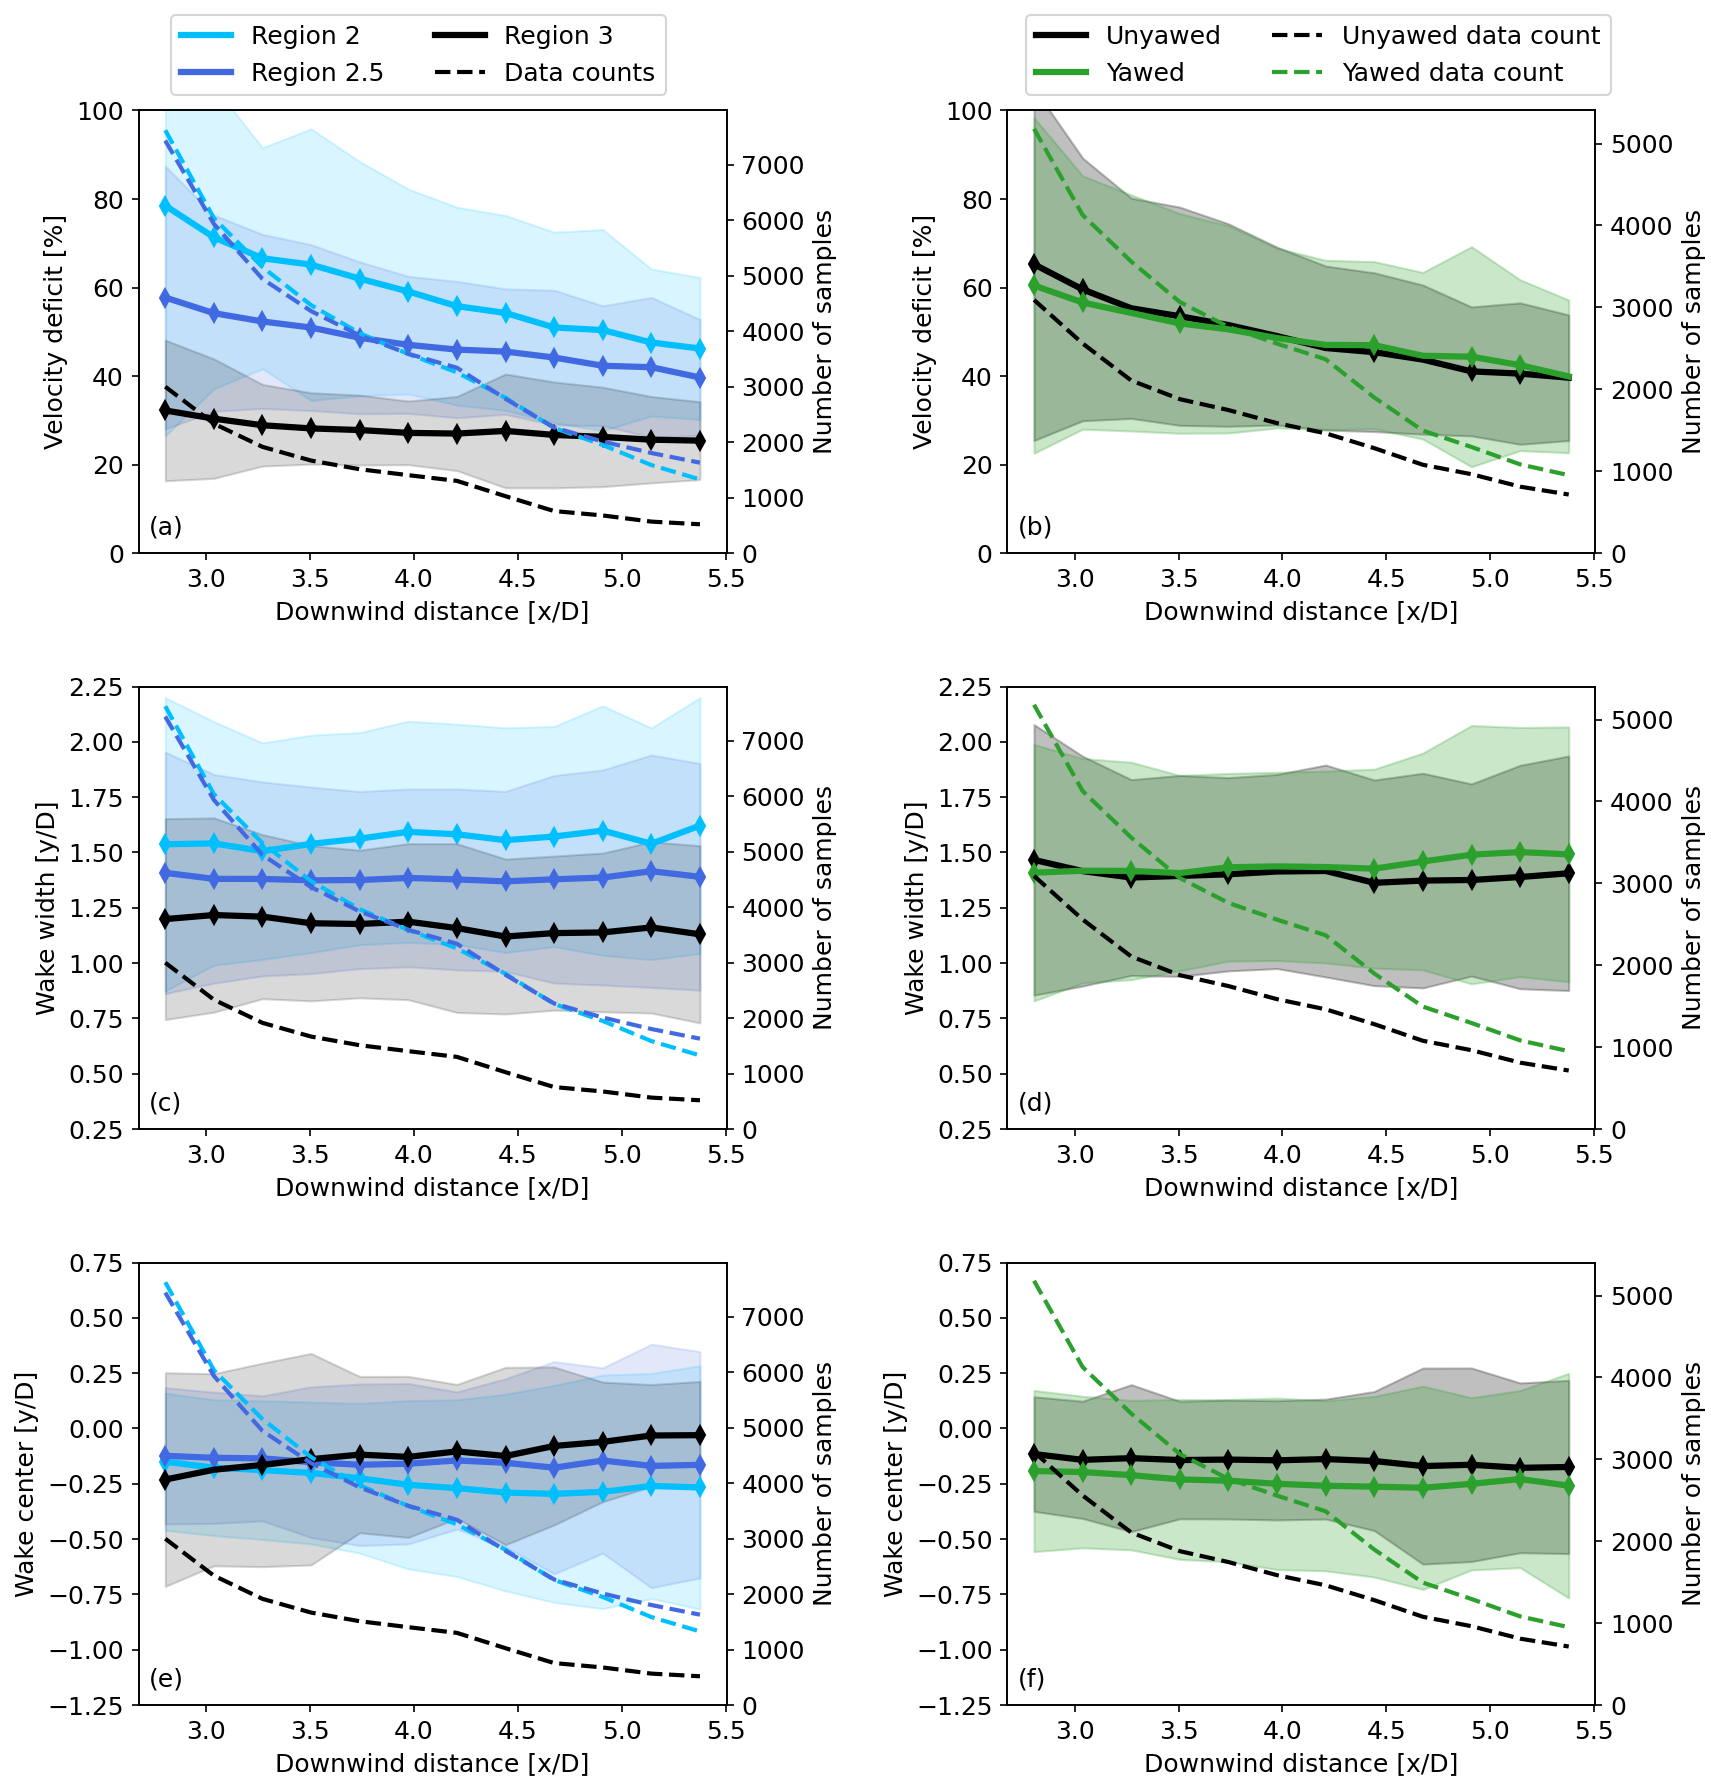

In [116]:
### Turbine operating condition

fig=plt.figure(figsize=(12,12), dpi=150)
fmt='-'
sdif='d'

### Velocity deficit

ax1=fig.add_subplot(321)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], WD_region.R2_mean, lw=3, fmt=fmt, color="deepskyblue", label="Region 2")
ax1.fill_between(Rd[0:n], WD_region.R2_mean-WD_region.R2_std, WD_region.R2_mean+WD_region.R2_std, color='deepskyblue', alpha=0.15)
ax1.errorbar(Rd[0:n], WD_region.R2_mean.mask(WD_region['R2_test']>alpha, other=np.nan), fmt=sdif, lw=3, color="deepskyblue")
ax1.errorbar(Rd[0:n], WD_region.R2p5_mean, lw=3, fmt=fmt, color="royalblue", label="Region 2.5")
ax1.fill_between(Rd[0:n], WD_region.R2p5_mean-WD_region.R2p5_std, WD_region.R2p5_mean+WD_region.R2p5_std, color='royalblue', alpha=0.15)
ax1.errorbar(Rd[0:n], WD_region.R2p5_mean.mask(WD_region['R2p5_test']>alpha, other=np.nan), fmt=sdif, lw=3, color="royalblue")
ax1.errorbar(Rd[0:n], WD_region.R3_mean, lw=3, fmt=fmt, color="black", label="Region 3")
ax1.fill_between(Rd[0:n], WD_region.R3_mean-WD_region.R3_std, WD_region.R3_mean+WD_region.R3_std, color='black', alpha=0.15)
ax1.errorbar(Rd[0:n], WD_region.R3_mean.mask(WD_region['R3_test']>alpha, other=np.nan), fmt=sdif, lw=3, color="black")
ax2.errorbar(Rd[0:n], WD_region.R2_count, fmt='--', lw=2, color='deepskyblue', label="Region2")
ax2.errorbar(Rd[0:n], WD_region.R2p5_count, fmt='--', lw=2, color='royalblue',  label="Region2.5")
ax2.errorbar(Rd[0:n], WD_region.R3_count, fmt='--', lw=2, color='black',  label="Region3")
ax1.errorbar(Rd[0:n], label_sidechain, label='Data counts', fmt='--', lw=2, color='black')
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax2.set_ylim(ymin=0)
ax1.text(0.018,0.042,'(a)',fontsize=12,transform=ax1.transAxes)

ax1=fig.add_subplot(322)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], WD_yawed_unyawed.Unyawed_mean, fmt=fmt, lw=3, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], WD_yawed_unyawed.Unyawed_mean-WD_yawed_unyawed.Unyawed_std, WD_yawed_unyawed.Unyawed_mean+WD_yawed_unyawed.Unyawed_std, color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], WD_yawed_unyawed.Unyawed_count, fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], WD_yawed_unyawed.Unyawed_mean.mask(WD_yawed_unyawed['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="black")
ax1.errorbar(Rd[0:n], WD_yawed_unyawed.Yawed_mean, fmt=fmt, lw=3, color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], WD_yawed_unyawed.Yawed_mean-WD_yawed_unyawed.Yawed_std, WD_yawed_unyawed.Yawed_mean+WD_yawed_unyawed.Yawed_std, color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], WD_yawed_unyawed.Yawed_count, fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], WD_yawed_unyawed.Yawed_mean.mask(WD_yawed_unyawed['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="C2")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='black', label="Data counts")
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax2.set_ylim(ymin=0)
ax1.text(0.018,0.042,'(b)',fontsize=12,transform=ax1.transAxes)


### Wake width

ax1=fig.add_subplot(323)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], WW_region.R2_mean, lw=3, fmt=fmt, color="deepskyblue", label="Region 2")
ax1.fill_between(Rd[0:n], WW_region.R2_mean-WW_region.R2_std, WW_region.R2_mean+WW_region.R2_std, color='deepskyblue', alpha=0.15)
ax1.errorbar(Rd[0:n], WW_region.R2_mean.mask(WW_region['R2_test']>alpha, other=np.nan), fmt=sdif, lw=3, color="deepskyblue")
ax1.errorbar(Rd[0:n], WW_region.R2p5_mean, lw=3, fmt=fmt, color="royalblue", label="Region 2.5")
ax1.fill_between(Rd[0:n], WW_region.R2p5_mean-WW_region.R2p5_std, WW_region.R2p5_mean+WW_region.R2p5_std, color='royalblue', alpha=0.15)
ax1.errorbar(Rd[0:n], WW_region.R2p5_mean.mask(WW_region['R2p5_test']>alpha, other=np.nan), fmt=sdif, lw=3, color="royalblue")
ax1.errorbar(Rd[0:n], WW_region.R3_mean, lw=3, fmt=fmt, color="black", label="Region 3")
ax1.fill_between(Rd[0:n], WW_region.R3_mean-WW_region.R3_std, WW_region.R3_mean+WW_region.R3_std, color='black', alpha=0.15)
ax1.errorbar(Rd[0:n], WW_region.R3_mean.mask(WW_region['R3_test']>alpha, other=np.nan), fmt=sdif, lw=3, color="black")
ax2.errorbar(Rd[0:n], WW_region.R2_count, fmt='--', lw=2, color='deepskyblue', label="Region2")
ax2.errorbar(Rd[0:n], WW_region.R2p5_count, fmt='--', lw=2, color='royalblue',  label="Region2.5")
ax2.errorbar(Rd[0:n], WW_region.R3_count, fmt='--', lw=2, color='black',  label="Region3")
ax1.errorbar(Rd[0:n], label_sidechain, label='Data counts', fmt='--', lw=2, color='black')
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake width [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0.25,2.25)
ax2.set_ylim(ymin=0)
ax1.text(0.018,0.042,'(c)',fontsize=12,transform=ax1.transAxes)

ax1=fig.add_subplot(324)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], WW_yawed_unyawed.Unyawed_mean, fmt=fmt, lw=3, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], WW_yawed_unyawed.Unyawed_mean-WW_yawed_unyawed.Unyawed_std, WW_yawed_unyawed.Unyawed_mean+WW_yawed_unyawed.Unyawed_std, color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], WW_yawed_unyawed.Unyawed_count, fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], WW_yawed_unyawed.Unyawed_mean.mask(WW_yawed_unyawed['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="black")
ax1.errorbar(Rd[0:n], WW_yawed_unyawed.Yawed_mean, fmt=fmt, lw=3, color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], WW_yawed_unyawed.Yawed_mean-WW_yawed_unyawed.Yawed_std, WW_yawed_unyawed.Yawed_mean+WW_yawed_unyawed.Yawed_std, color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], WW_yawed_unyawed.Yawed_count, fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], WW_yawed_unyawed.Yawed_mean.mask(WW_yawed_unyawed['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="C2")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='black', label="Data counts")
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake width [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0.25,2.25)
ax2.set_ylim(ymin=0)
ax1.text(0.018,0.042,'(d)',fontsize=12,transform=ax1.transAxes)


### Wake center

ax1=fig.add_subplot(325)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], CL_region.R2_mean, lw=3, fmt=fmt, color="deepskyblue", label="Region 2")
ax1.fill_between(Rd[0:n], CL_region.R2_mean-CL_region.R2_std, CL_region.R2_mean+CL_region.R2_std, color='deepskyblue', alpha=0.15)
ax1.errorbar(Rd[0:n], CL_region.R2_mean.mask(CL_region['R2_test']>alpha, other=np.nan), fmt=sdif, lw=3, color="deepskyblue")
ax1.errorbar(Rd[0:n], CL_region.R2p5_mean, lw=3, fmt=fmt, color="royalblue", label="Region 2.5")
ax1.fill_between(Rd[0:n], CL_region.R2p5_mean-CL_region.R2p5_std, CL_region.R2p5_mean+CL_region.R2p5_std, color='royalblue', alpha=0.15)
ax1.errorbar(Rd[0:n], CL_region.R2p5_mean.mask(CL_region['R2p5_test']>alpha, other=np.nan), fmt=sdif, lw=3, color="royalblue")
ax1.errorbar(Rd[0:n], CL_region.R3_mean, lw=3, fmt=fmt, color="black", label="Region 3")
ax1.fill_between(Rd[0:n], CL_region.R3_mean-CL_region.R3_std, CL_region.R3_mean+CL_region.R3_std, color='black', alpha=0.15)
ax1.errorbar(Rd[0:n], CL_region.R3_mean.mask(CL_region['R3_test']>alpha, other=np.nan), fmt=sdif, lw=3, color="black")
ax2.errorbar(Rd[0:n], CL_region.R2_count, fmt='--', lw=2, color='deepskyblue', label="Region2")
ax2.errorbar(Rd[0:n], CL_region.R2p5_count, fmt='--', lw=2, color='royalblue',  label="Region2.5")
ax2.errorbar(Rd[0:n], CL_region.R3_count, fmt='--', lw=2, color='black',  label="Region3")
ax1.errorbar(Rd[0:n], label_sidechain, label='Data counts', fmt='--', lw=2, color='black')
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake center [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(-1.25,0.75)
ax2.set_ylim(ymin=0)
ax1.text(0.018,0.042,'(e)',fontsize=12,transform=ax1.transAxes)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc='upper center', bbox_to_anchor=[0.25, 1.02], fontsize=12)

ax1=fig.add_subplot(326)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], CL_yawed_unyawed.Unyawed_mean, fmt=fmt, lw=3, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], CL_yawed_unyawed.Unyawed_mean-CL_yawed_unyawed.Unyawed_std, CL_yawed_unyawed.Unyawed_mean+CL_yawed_unyawed.Unyawed_std, color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], CL_yawed_unyawed.Unyawed_count, fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], CL_yawed_unyawed.Unyawed_mean.mask(CL_yawed_unyawed['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="black")
ax1.errorbar(Rd[0:n], CL_yawed_unyawed.Yawed_mean, fmt=fmt, lw=3, color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], CL_yawed_unyawed.Yawed_mean-CL_yawed_unyawed.Yawed_std, CL_yawed_unyawed.Yawed_mean+CL_yawed_unyawed.Yawed_std, color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], CL_yawed_unyawed.Yawed_count, fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], CL_yawed_unyawed.Yawed_mean.mask(CL_yawed_unyawed['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="C2")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='black', label="Unyawed data count")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='C2', label="Yawed data count")
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake center [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(-1.25,0.75)
ax2.set_ylim(ymin=0)
ax1.text(0.018,0.042,'(f)',fontsize=12,transform=ax1.transAxes)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc='upper center', bbox_to_anchor=[0.75, 1.02], fontsize=12)

fig.tight_layout(pad=3)

file_name = '/projects/jasi4471/peetz/Figures_Final_V1/region_separation.pdf'
plt.savefig(file_name, bbox_inches='tight', format='pdf')

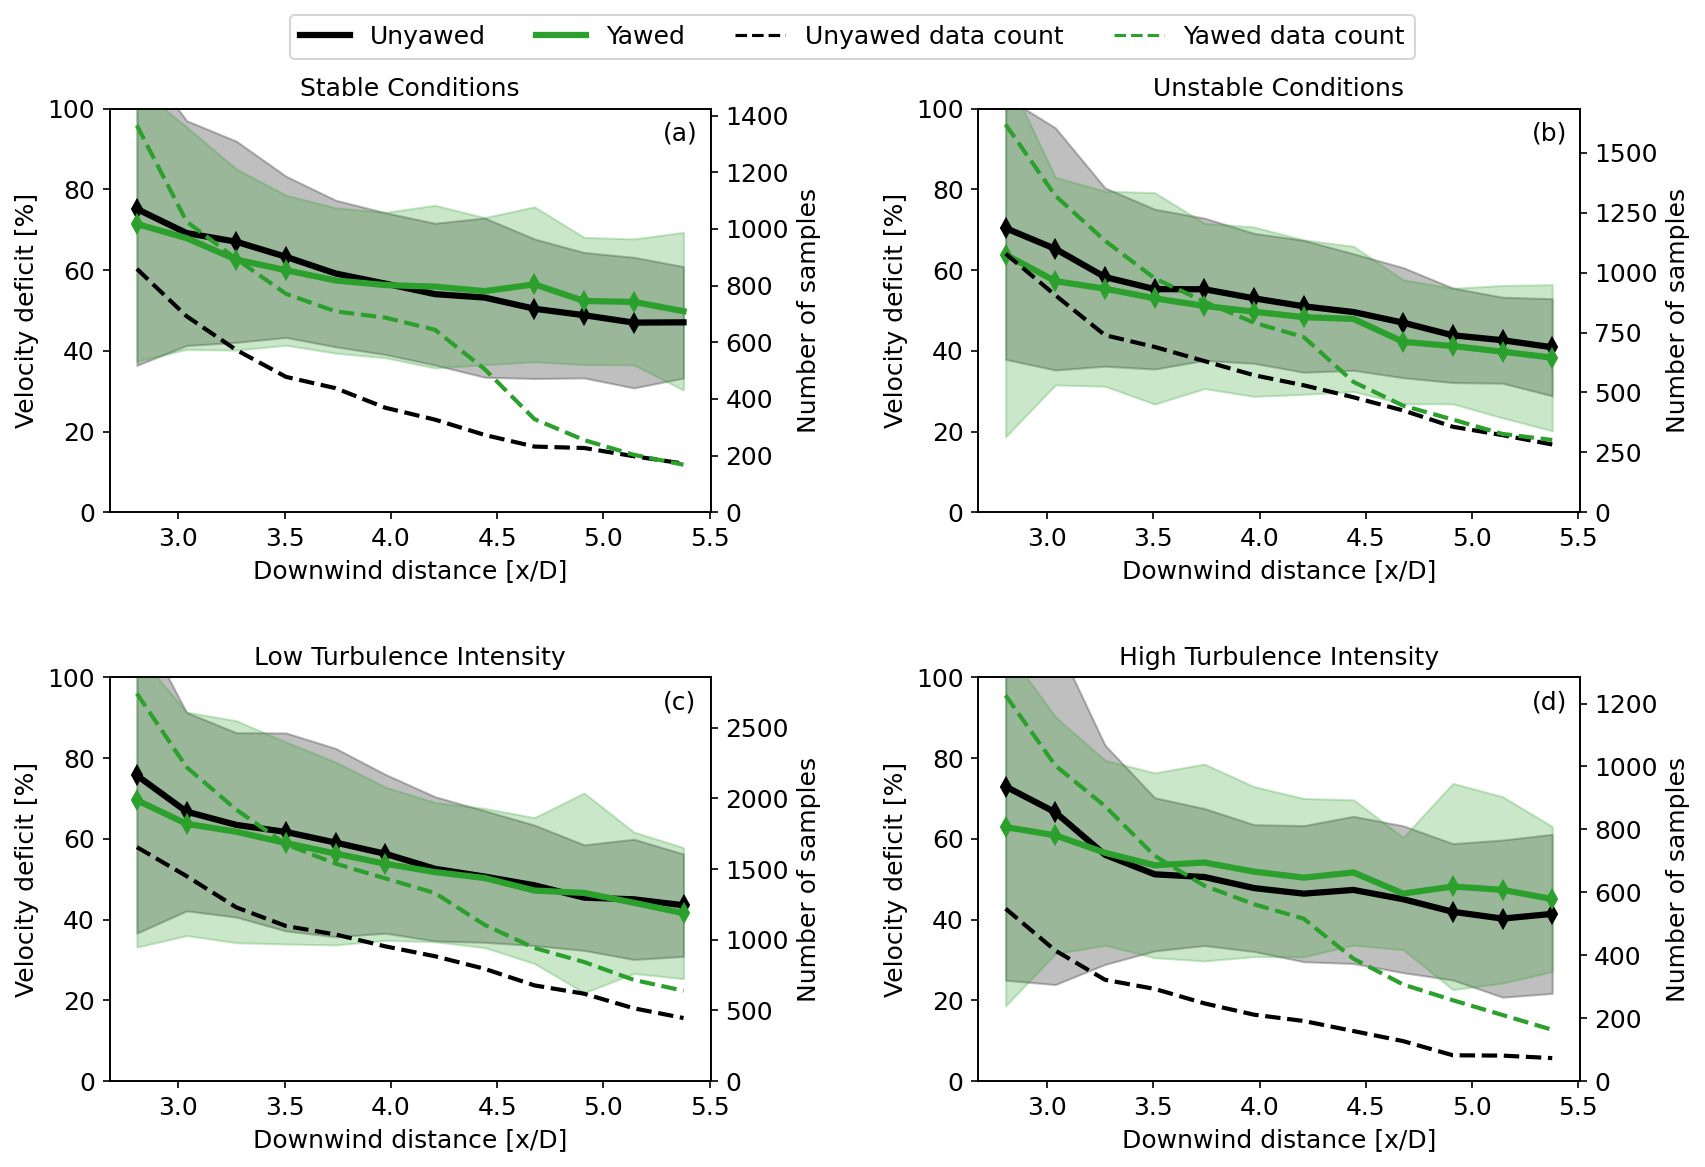

In [117]:
### Atmospheric stability - Velocity deficit

fig=plt.figure(figsize=(12,8), dpi=150)
fmt='-'
sdif='d'

ax1=fig.add_subplot(221)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], WD_stable.Unyawed_mean, lw=3, fmt=fmt, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], WD_stable.Unyawed_mean-WD_stable.Unyawed_std, WD_stable.Unyawed_mean+WD_stable.Unyawed_std, color="black", alpha=0.25)
ax2.errorbar(Rd[0:n], WD_stable.Unyawed_count, fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], WD_stable.Unyawed_mean.mask(WD_stable['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="black")
ax1.errorbar(Rd[0:n], WD_stable.Yawed_mean[0:n],lw=3, fmt=fmt,color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], WD_stable.Yawed_mean[0:n]-WD_stable.Yawed_std[0:n], WD_stable.Yawed_mean[0:n]+WD_stable.Yawed_std[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], WD_stable.Yawed_count[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], WD_stable.Yawed_mean.mask(WD_stable['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="C2")
ax1.set_title("Stable Conditions",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax2.set_ylim(ymin=0)
ax1.text(0.92,0.92, '(a)',fontsize=12, transform=ax1.transAxes)

ax1=fig.add_subplot(222)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], WD_unstable.Unyawed_mean, lw=3, fmt=fmt, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], WD_unstable.Unyawed_mean-WD_unstable.Unyawed_std, WD_unstable.Unyawed_mean+WD_unstable.Unyawed_std, color="black", alpha=0.25)
ax2.errorbar(Rd[0:n], WD_unstable.Unyawed_count, fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], WD_unstable.Unyawed_mean.mask(WD_unstable['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="black")
ax1.errorbar(Rd[0:n], WD_unstable.Yawed_mean[0:n],lw=3, fmt=fmt,color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], WD_unstable.Yawed_mean[0:n]-WD_unstable.Yawed_std[0:n], WD_unstable.Yawed_mean[0:n]+WD_unstable.Yawed_std[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], WD_unstable.Yawed_count[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], WD_unstable.Yawed_mean.mask(WD_unstable['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="C2")
ax1.set_title("Unstable Conditions",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax2.set_ylim(ymin=0)
ax1.text(0.92,0.92, '(b)',fontsize=12, transform=ax1.transAxes)

ax1=fig.add_subplot(223)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], WD_lowTI.Unyawed_mean, lw=3, fmt=fmt, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], WD_lowTI.Unyawed_mean-WD_lowTI.Unyawed_std, WD_lowTI.Unyawed_mean+WD_lowTI.Unyawed_std, color="black", alpha=0.25)
ax2.errorbar(Rd[0:n], WD_lowTI.Unyawed_count, fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], WD_lowTI.Unyawed_mean.mask(WD_lowTI['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="black")
ax1.errorbar(Rd[0:n], WD_lowTI.Yawed_mean[0:n],lw=3, fmt=fmt,color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], WD_lowTI.Yawed_mean[0:n]-WD_lowTI.Yawed_std[0:n], WD_lowTI.Yawed_mean[0:n]+WD_lowTI.Yawed_std[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], WD_lowTI.Yawed_count[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], WD_lowTI.Yawed_mean.mask(WD_lowTI['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="C2")
ax1.set_title("Low Turbulence Intensity",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax2.set_ylim(ymin=0)
ax1.text(0.92,0.92, '(c)',fontsize=12, transform=ax1.transAxes)

ax1=fig.add_subplot(224)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], WD_highTI.Unyawed_mean, lw=3, fmt=fmt, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], WD_highTI.Unyawed_mean-WD_highTI.Unyawed_std, WD_highTI.Unyawed_mean+WD_highTI.Unyawed_std, color="black", alpha=0.25)
ax2.errorbar(Rd[0:n], WD_highTI.Unyawed_count, fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], WD_highTI.Unyawed_mean.mask(WD_highTI['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="black")
ax1.errorbar(Rd[0:n], WD_highTI.Yawed_mean[0:n],lw=3, fmt=fmt,color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], WD_highTI.Yawed_mean[0:n]-WD_highTI.Yawed_std[0:n], WD_highTI.Yawed_mean[0:n]+WD_highTI.Yawed_std[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], WD_highTI.Yawed_count[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], WD_highTI.Yawed_mean.mask(WD_highTI['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="C2")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',color='black', label="Unyawed data count")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',color='C2', label="Yawed data count")
ax1.set_title("High Turbulence Intensity",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax2.set_ylim(ymin=0)
ax1.text(0.92,0.92, '(d)',fontsize=12, transform=ax1.transAxes)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, ncol=4, loc='upper center', bbox_to_anchor=[0.5, 1.01], fontsize=12)

fig.tight_layout(pad=3)

file_name = '/projects/jasi4471/peetz/Figures_Final_V1/yawed_unyawed_conditions_WD.pdf'
plt.savefig(file_name, bbox_inches='tight', format='pdf')

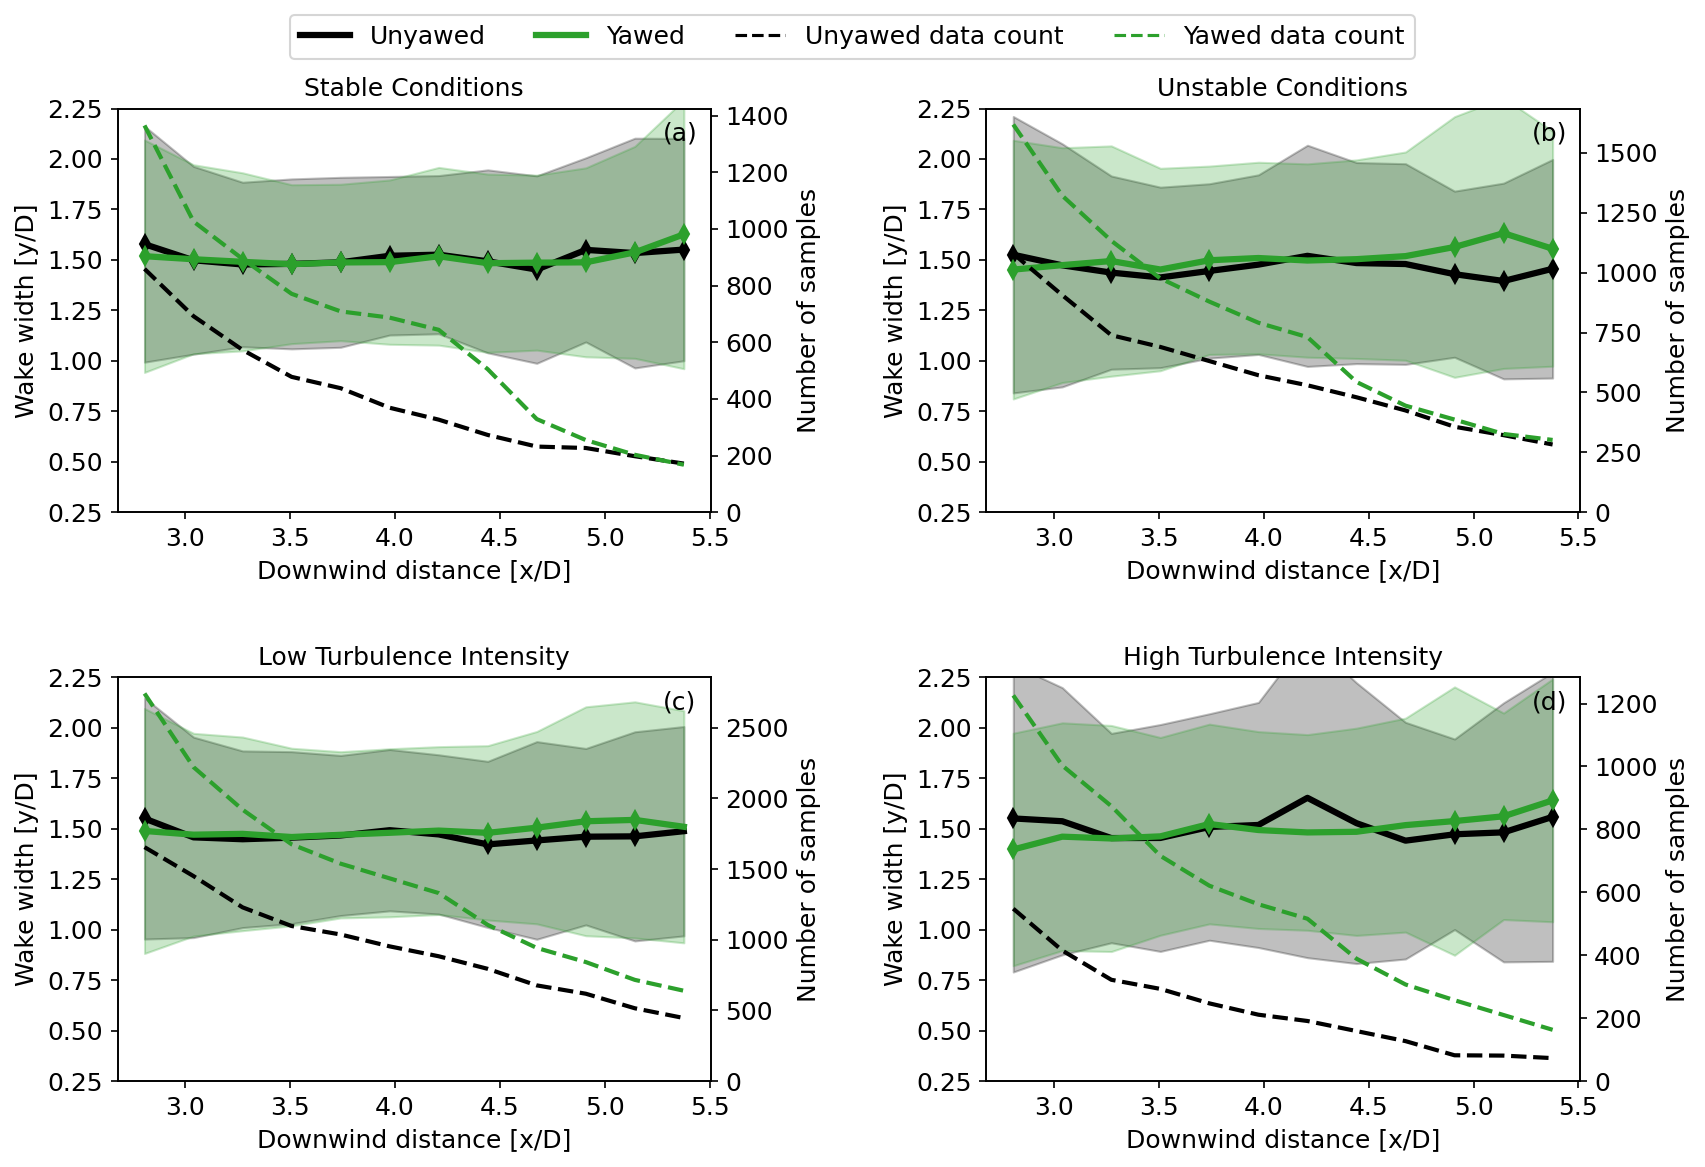

In [118]:
### Atmospheric stability - Wake width

fig=plt.figure(figsize=(12,8), dpi=150)
fmt='-'
sdif='d'

ax1=fig.add_subplot(221)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], WW_stable.Unyawed_mean, lw=3, fmt=fmt, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], WW_stable.Unyawed_mean-WW_stable.Unyawed_std, WW_stable.Unyawed_mean+WW_stable.Unyawed_std, color="black", alpha=0.25)
ax2.errorbar(Rd[0:n], WW_stable.Unyawed_count, fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], WW_stable.Unyawed_mean.mask(WW_stable['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="black")
ax1.errorbar(Rd[0:n], WW_stable.Yawed_mean[0:n],lw=3, fmt=fmt,color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], WW_stable.Yawed_mean[0:n]-WW_stable.Yawed_std[0:n], WW_stable.Yawed_mean[0:n]+WW_stable.Yawed_std[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], WW_stable.Yawed_count[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], WW_stable.Yawed_mean.mask(WW_stable['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="C2")
ax1.set_title("Stable Conditions",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake width [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0.25,2.25)
ax2.set_ylim(ymin=0)
ax1.text(0.92,0.92, '(a)',fontsize=12, transform=ax1.transAxes)

ax1=fig.add_subplot(222)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], WW_unstable.Unyawed_mean, lw=3, fmt=fmt, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], WW_unstable.Unyawed_mean-WW_unstable.Unyawed_std, WW_unstable.Unyawed_mean+WW_unstable.Unyawed_std, color="black", alpha=0.25)
ax2.errorbar(Rd[0:n], WW_unstable.Unyawed_count, fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], WW_unstable.Unyawed_mean.mask(WW_unstable['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="black")
ax1.errorbar(Rd[0:n], WW_unstable.Yawed_mean[0:n],lw=3, fmt=fmt,color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], WW_unstable.Yawed_mean[0:n]-WW_unstable.Yawed_std[0:n], WW_unstable.Yawed_mean[0:n]+WW_unstable.Yawed_std[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], WW_unstable.Yawed_count[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], WW_unstable.Yawed_mean.mask(WW_unstable['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="C2")
ax1.set_title("Unstable Conditions",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake width [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0.25,2.25)
ax2.set_ylim(ymin=0)
ax1.text(0.92,0.92, '(b)',fontsize=12, transform=ax1.transAxes)

ax1=fig.add_subplot(223)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], WW_lowTI.Unyawed_mean, lw=3, fmt=fmt, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], WW_lowTI.Unyawed_mean-WW_lowTI.Unyawed_std, WW_lowTI.Unyawed_mean+WW_lowTI.Unyawed_std, color="black", alpha=0.25)
ax2.errorbar(Rd[0:n], WW_lowTI.Unyawed_count, fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], WW_lowTI.Unyawed_mean.mask(WW_lowTI['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="black")
ax1.errorbar(Rd[0:n], WW_lowTI.Yawed_mean[0:n],lw=3, fmt=fmt,color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], WW_lowTI.Yawed_mean[0:n]-WW_lowTI.Yawed_std[0:n], WW_lowTI.Yawed_mean[0:n]+WW_lowTI.Yawed_std[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], WW_lowTI.Yawed_count[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], WW_lowTI.Yawed_mean.mask(WW_lowTI['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="C2")
ax1.set_title("Low Turbulence Intensity",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake width [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0.25,2.25)
ax2.set_ylim(ymin=0)
ax1.text(0.92,0.92, '(c)',fontsize=12, transform=ax1.transAxes)

ax1=fig.add_subplot(224)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], WW_highTI.Unyawed_mean, lw=3, fmt=fmt, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], WW_highTI.Unyawed_mean-WW_highTI.Unyawed_std, WW_highTI.Unyawed_mean+WW_highTI.Unyawed_std, color="black", alpha=0.25)
ax2.errorbar(Rd[0:n], WW_highTI.Unyawed_count, fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], WW_highTI.Unyawed_mean.mask(WW_highTI['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="black")
ax1.errorbar(Rd[0:n], WW_highTI.Yawed_mean[0:n],lw=3, fmt=fmt,color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], WW_highTI.Yawed_mean[0:n]-WW_highTI.Yawed_std[0:n], WW_highTI.Yawed_mean[0:n]+WW_highTI.Yawed_std[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], WW_highTI.Yawed_count[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], WW_highTI.Yawed_mean.mask(WW_highTI['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="C2")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',color='black', label="Unyawed data count")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',color='C2', label="Yawed data count")
ax1.set_title("High Turbulence Intensity",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake width [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0.25,2.25)
ax2.set_ylim(ymin=0)
ax1.text(0.92,0.92, '(d)',fontsize=12, transform=ax1.transAxes)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, ncol=4, loc='upper center', bbox_to_anchor=[0.5, 1.01], fontsize=12)

fig.tight_layout(pad=3)

file_name = '/projects/jasi4471/peetz/Figures_Final_V1/yawed_unyawed_conditions_WW.pdf'
plt.savefig(file_name, bbox_inches='tight', format='pdf')

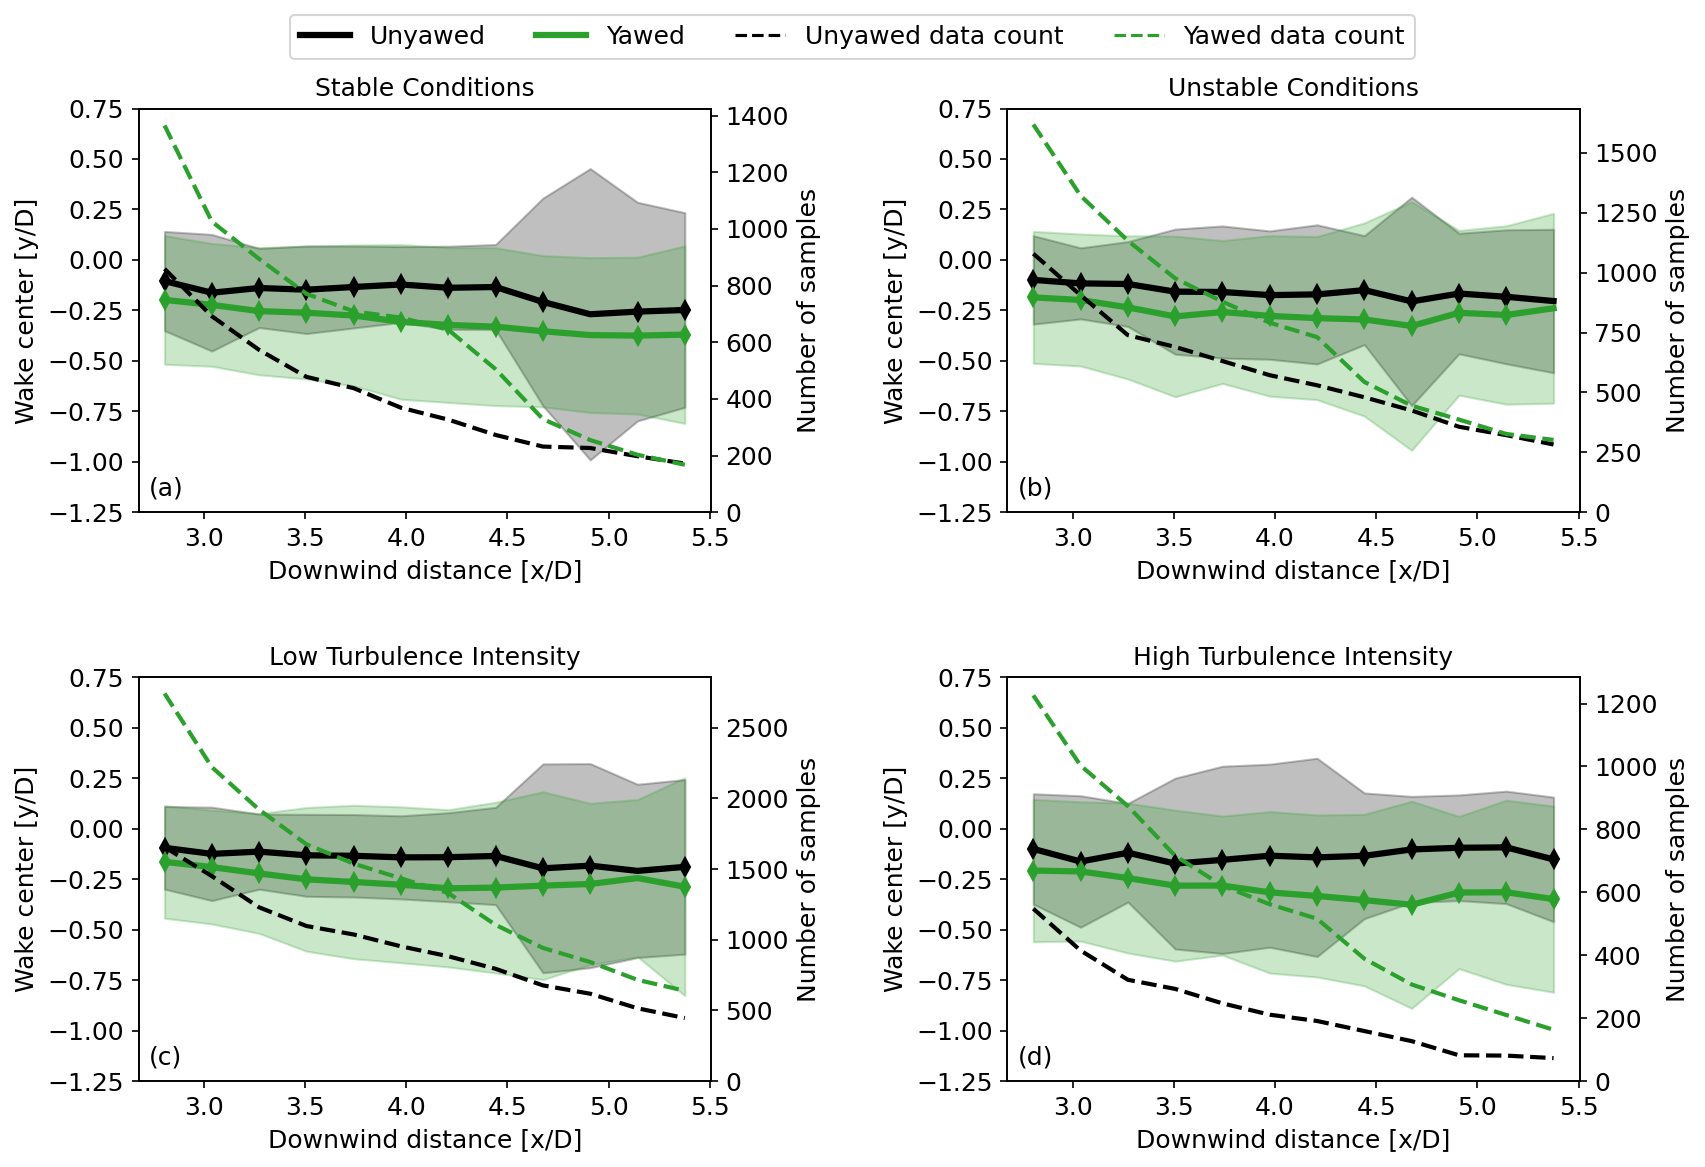

In [119]:
### Atmospheric stability - Wake center

fig=plt.figure(figsize=(12,8), dpi=150)
fmt='-'
sdif='d'

ax1=fig.add_subplot(221)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], CL_stable.Unyawed_mean, lw=3, fmt=fmt, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], CL_stable.Unyawed_mean-CL_stable.Unyawed_std, CL_stable.Unyawed_mean+CL_stable.Unyawed_std, color="black", alpha=0.25)
ax2.errorbar(Rd[0:n], CL_stable.Unyawed_count, fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], CL_stable.Unyawed_mean.mask(CL_stable['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="black")
ax1.errorbar(Rd[0:n], CL_stable.Yawed_mean[0:n],lw=3, fmt=fmt,color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], CL_stable.Yawed_mean[0:n]-CL_stable.Yawed_std[0:n], CL_stable.Yawed_mean[0:n]+CL_stable.Yawed_std[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], CL_stable.Yawed_count[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], CL_stable.Yawed_mean.mask(CL_stable['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="C2")
ax1.set_title("Stable Conditions",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake center [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(-1.25,0.75)
ax2.set_ylim(ymin=0)
ax1.text(0.018,0.042, '(a)',fontsize=12, transform=ax1.transAxes)

ax1=fig.add_subplot(222)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], CL_unstable.Unyawed_mean, lw=3, fmt=fmt, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], CL_unstable.Unyawed_mean-CL_unstable.Unyawed_std, CL_unstable.Unyawed_mean+CL_unstable.Unyawed_std, color="black", alpha=0.25)
ax2.errorbar(Rd[0:n], CL_unstable.Unyawed_count, fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], CL_unstable.Unyawed_mean.mask(CL_unstable['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="black")
ax1.errorbar(Rd[0:n], CL_unstable.Yawed_mean[0:n],lw=3, fmt=fmt,color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], CL_unstable.Yawed_mean[0:n]-CL_unstable.Yawed_std[0:n], CL_unstable.Yawed_mean[0:n]+CL_unstable.Yawed_std[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], CL_unstable.Yawed_count[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], CL_unstable.Yawed_mean.mask(CL_unstable['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="C2")
ax1.set_title("Unstable Conditions",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake center [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(-1.25,0.75)
ax2.set_ylim(ymin=0)
ax1.text(0.018,0.042, '(b)',fontsize=12, transform=ax1.transAxes)

ax1=fig.add_subplot(223)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], CL_lowTI.Unyawed_mean, lw=3, fmt=fmt, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], CL_lowTI.Unyawed_mean-CL_lowTI.Unyawed_std, CL_lowTI.Unyawed_mean+CL_lowTI.Unyawed_std, color="black", alpha=0.25)
ax2.errorbar(Rd[0:n], CL_lowTI.Unyawed_count, fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], CL_lowTI.Unyawed_mean.mask(CL_lowTI['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="black")
ax1.errorbar(Rd[0:n], CL_lowTI.Yawed_mean[0:n],lw=3, fmt=fmt,color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], CL_lowTI.Yawed_mean[0:n]-CL_lowTI.Yawed_std[0:n], CL_lowTI.Yawed_mean[0:n]+CL_lowTI.Yawed_std[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], CL_lowTI.Yawed_count[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], CL_lowTI.Yawed_mean.mask(CL_lowTI['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="C2")
ax1.set_title("Low Turbulence Intensity",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake center [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(-1.25,0.75)
ax2.set_ylim(ymin=0)
ax1.text(0.018,0.042, '(c)',fontsize=12, transform=ax1.transAxes)

ax1=fig.add_subplot(224)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], CL_highTI.Unyawed_mean, lw=3, fmt=fmt, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], CL_highTI.Unyawed_mean-CL_highTI.Unyawed_std, CL_highTI.Unyawed_mean+CL_highTI.Unyawed_std, color="black", alpha=0.25)
ax2.errorbar(Rd[0:n], CL_highTI.Unyawed_count, fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], CL_highTI.Unyawed_mean.mask(CL_highTI['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="black")
ax1.errorbar(Rd[0:n], CL_highTI.Yawed_mean[0:n],lw=3, fmt=fmt,color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], CL_highTI.Yawed_mean[0:n]-CL_highTI.Yawed_std[0:n], CL_highTI.Yawed_mean[0:n]+CL_highTI.Yawed_std[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], CL_highTI.Yawed_count[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], CL_highTI.Yawed_mean.mask(CL_highTI['T-test']>alpha, other=np.nan), fmt=sdif, lw=3, color="C2")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',color='black', label="Unyawed data count")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',color='C2', label="Yawed data count")
ax1.set_title("High Turbulence Intensity",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake center [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(-1.25,0.75)
ax2.set_ylim(ymin=0)
ax1.text(0.018,0.042, '(d)',fontsize=12, transform=ax1.transAxes)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, ncol=4, loc='upper center', bbox_to_anchor=[0.5, 1.01], fontsize=12)

fig.tight_layout(pad=3)

file_name = '/projects/jasi4471/peetz/Figures_Final_V1/yawed_unyawed_conditions_CL.pdf'
plt.savefig(file_name, bbox_inches='tight', format='pdf')